# INTRODUCTION TO THE PROBLEM AND DATASET

## PROBLEM STATEMENT

> Over the years, inflation in India has averaged around 6%, yet many people still prefer traditional investment options like `Fixed Deposits (FDs) and Recurring Deposits (RDs), which often yield returns lower than inflation`. A common perception among Indians is that capital markets and investments are complex, requiring advanced financial knowledge. As a result, many `hesitate to explore stock markets and other investment opportunities, limiting their financial growth`.  

> To address this gap, a tech-driven platform was launched in 2020 with the goal of `simplifying finance and making investment decisions more accessible`. Using `artificial intelligence (AI) and machine learning (ML)`, the platform provides `smart news discovery, real-time stock insights, and a social community for discussions`. By delivering curated financial information in an easy-to-understand format, it empowers users—especially first-time investors—to make informed decisions with minimal effort.

## OBJECTIVE OF THE PROJECT

> The goal of this project is to classify news articles into categories like `politics, technology, sports, business, and entertainment` using `Natural Language Processing (NLP) and Machine Learning (ML)`. The project involves text preprocessing, feature extraction, and training multiple classification models.

> At least three different models, including `Naïve Bayes, Decision Tree, and Random Forest`, will be implemented and compared to determine the best-performing approach.

## IMPORT ALL THE REQUIRED LIBRARIES

In [667]:
# To ignore all warnings
import warnings

# for creating random numbers
import random

# for string operations
import string

# for permutations and combinations
import itertools

# for proper display of dataframes and images
from IPython.display import display
from PIL import Image

# for saving the models
import pickle

# For reading & manipulating the data
import pandas as pd
import numpy as np

# For visualizing the data
import matplotlib.pyplot as plt
import seaborn as sns
import plotly.express as px
from pprint import pprint
from sklearn.manifold import TSNE
import matplotlib.patches as mpatches

# To use Regular Expressions
import re

# for parallel processing
import dask.dataframe as dd
import multiprocessing

# To display progress bars
from tqdm.notebook import tqdm

# for wordcloud
from wordcloud import WordCloud, STOPWORDS

# To use Natural Language Processing
import nltk
import spacy
from spacy.lang.en.stop_words import STOP_WORDS

# For tokenization
from nltk.tokenize import word_tokenize,sent_tokenize,TweetTokenizer
nltk.download('punkt')
nltk.download('punkt_tab')
nltk.download('wordnet')
nltk.download('omw-1.4')
nltk.download('averaged_perceptron_tagger')
nltk.download('tagsets')
nltk.download('universal_tagset')
nltk.download('treebank')

# to expand contractions
import contractions

# To remove stopwords
from nltk.corpus import stopwords
nltk.download('stopwords')

# for stemming
from nltk.stem import PorterStemmer,LancasterStemmer,SnowballStemmer
# For lemmetization
from nltk import WordNetLemmatizer
nltk.download('wordnet')

# For BoW & TF-IDF
from sklearn.feature_extraction.text import CountVectorizer, TfidfVectorizer

# For encoding the categorical variable
import category_encoders as ce
from sklearn.preprocessing import LabelEncoder,OneHotEncoder

# for word embeddings
from gensim.models import Word2Vec

#to detect language
from langdetect import detect,DetectorFactory

# To try out different ML models
from sklearn.tree import DecisionTreeClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.naive_bayes import MultinomialNB
from sklearn.ensemble import RandomForestClassifier,GradientBoostingClassifier
from sklearn.linear_model import LogisticRegression 

# To perform train-test split
from sklearn.model_selection import train_test_split,RandomizedSearchCV

# Performace Metrics for evaluating the model
from sklearn.metrics import accuracy_score, roc_auc_score, f1_score, precision_score, recall_score
from sklearn.metrics import confusion_matrix, classification_report,ConfusionMatrixDisplay
from sklearn.metrics.pairwise import cosine_similarity

# Named Entity Recognition
from spacy import displacy

# for logging the metrics and artifacts
import mlflow
import mlflow.sklearn
 
warnings.simplefilter('ignore')

[nltk_data] Downloading package punkt to
[nltk_data]     C:\Users\saina\AppData\Roaming\nltk_data...
[nltk_data]   Package punkt is already up-to-date!
[nltk_data] Downloading package punkt_tab to
[nltk_data]     C:\Users\saina\AppData\Roaming\nltk_data...
[nltk_data]   Package punkt_tab is already up-to-date!
[nltk_data] Downloading package wordnet to
[nltk_data]     C:\Users\saina\AppData\Roaming\nltk_data...
[nltk_data]   Package wordnet is already up-to-date!
[nltk_data] Downloading package omw-1.4 to
[nltk_data]     C:\Users\saina\AppData\Roaming\nltk_data...
[nltk_data]   Package omw-1.4 is already up-to-date!
[nltk_data] Downloading package averaged_perceptron_tagger to
[nltk_data]     C:\Users\saina\AppData\Roaming\nltk_data...
[nltk_data]   Package averaged_perceptron_tagger is already up-to-
[nltk_data]       date!
[nltk_data] Downloading package tagsets to
[nltk_data]     C:\Users\saina\AppData\Roaming\nltk_data...
[nltk_data]   Package tagsets is already up-to-date!
[nltk_d

## IMPORT DATASET

In [516]:
data = pd.read_csv(r"C:\Users\saina\Desktop\DS_ML_AI\Scaler\Module_21_NLP\Case_studies\other\news-data.csv")

## DESCRIPTION REGARDING EACH COLUMN OF THE DATASET

In [517]:
data.sample(10,random_state=42)

,Category,Article
414,Politics,brown and blair face new rift claims for the u...
420,Business,small firms hit by rising costs rising fuel ...
1644,Entertainment,spirit awards hail sideways the comedy sideway...
416,Technology,microsoft releases patches microsoft has warne...
1232,Sports,arsenal through on penalties arsenal win 4-2 o...
1544,Business,jobs go at oracle after takeover oracle has an...
1748,Business,id theft surge hits us consumers almost a quar...
1264,Sports,poll explains free-kick decision referee graha...
629,Sports,parmar ruled out of davis cup tie a knee injur...
1043,Technology,video phones act as dating tools technologies ...


In [518]:
data["Category"].unique()

array(['Technology', 'Business', 'Sports', 'Entertainment', 'Politics'],
      dtype=object)

|Column Name|Description|
|-----------|-----------|
|**Category**|Category of Article ['Technology', 'Business', 'Sports', 'Entertainment', 'Politics'] (Target Variable of the dataset)|
|**Article**|Text Extracted from News Article|

# EDA, VISUALISATION AND TRAIN TEST SPLIT

## SHAPE OF THE DATA

In [519]:
print(f"Number of rows in the dataset = {data.shape[0]}")
print(f"Number of columns in the dataset = {data.shape[1]}")

Number of rows in the dataset = 2225
Number of columns in the dataset = 2


## DATASET INFO

In [520]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2225 entries, 0 to 2224
Data columns (total 2 columns):
 #   Column    Non-Null Count  Dtype 
---  ------    --------------  ----- 
 0   Category  2225 non-null   object
 1   Article   2225 non-null   object
dtypes: object(2)
memory usage: 34.9+ KB


## NULL VALUE DETECTION

In [521]:
# Null value count
data.isnull().sum()

Category    0
Article     0
dtype: int64

**Observation**
> No Null Values in the dataset

## DESCRIPTIVE STATISTICS

In [522]:
data.describe()

,Category,Article
count,2225,2225
unique,5,2126
top,Sports,kennedy questions trust of blair lib dem leade...
freq,511,2


**Observation**
> There is difference between count and unique value of Article. So Duplicated Articles are present in the "Article" Column.

> Frequency of any article should be 1. 

## DUPLICATED ARTICLES DETECTION AND REMOVAL

In [523]:
data.duplicated().sum()

99

In [524]:
2225-2126

99

In [525]:
# Removing the duplicates
data.drop_duplicates(inplace=True)

##  VALUE COUNTS OF CATEGORY AND PIE CHART VISUALISATION

Labels in the dataset:  ['Sports', 'Business', 'Politics', 'Entertainment', 'Technology']
Category
Sports           504
Business         503
Politics         403
Entertainment    369
Technology       347
Name: count, dtype: int64


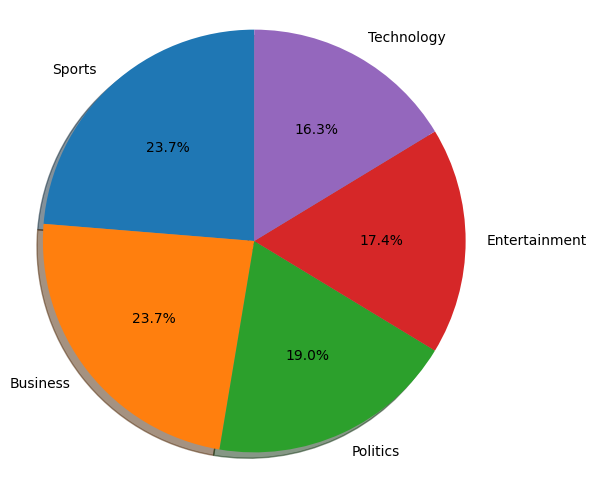

In [526]:
def pie_chart(dataframe):
    label_counts = dataframe.Category.value_counts()
    
    print('Labels in the dataset: ', label_counts.index.tolist())
    print(label_counts)

    labels = label_counts.index  # Corrected: Ensure labels match their counts
    sizes = label_counts.values  # Get counts directly
    
    plt.figure(figsize=(6, 6))
    plt.pie(sizes, labels=labels, autopct='%1.1f%%', shadow=True, startangle=90)
    plt.axis('equal')  # Keep the pie chart circular
    plt.show()

pie_chart(data)


## TRAIN TEST SPLIT STRATIFY BY CATEGORY

In [527]:
# Assuming 'data' is already loaded with the 'Category' column
# Split the dataset into features (X) and labels (y)
X = data['Article'].astype(str)
y = data['Category']

# Perform 80/20 split with stratification based on the 'Category' column
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42, stratify=y)

# Print the size of the training and testing datasets
print(f"Size of training dataset: {len(X_train)}")
print(f"Size of testing dataset: {len(X_test)}")


Size of training dataset: 1700
Size of testing dataset: 426


In [528]:
X_train = pd.DataFrame(X_train,columns=["Article"])
X_test = pd.DataFrame(X_test,columns=["Article"])
y_train = pd.DataFrame(y_train,columns=["Category"])
y_test = pd.DataFrame(y_test,columns=["Category"])

# TEST PROCESSING

In [529]:
categories = data["Category"].unique()

## BEFORE PREPROCESSING

In [530]:
# Sample articles from each category along with index
for category in categories:
    sample = X_train[y_train == category].sample(1, random_state=42)  # Select random article
    index = sample.index[0]  # Get index
    article = sample.values[0]  # Get article content
    print(f'\n{category} article (Index {index}): {article}')



Technology article (Index 881): [nan]

Business article (Index 881): [nan]

Sports article (Index 881): [nan]

Entertainment article (Index 881): [nan]

Politics article (Index 881): [nan]


In [531]:
list_of_X_train_sample_articles_index = [462,39,936,1048,104]

## TEST PREPROCESSING FUNCTIONS

In [532]:
sample = "Hello123!, I d like to test the articles."

### Function for Expanding Contractions

In [533]:
# Function to expand contractions
def expand_contractions(text):
    # Extract contractions and convert keys to lowercase
    contraction_map = {c.lower(): contractions.fix(c).lower() for c in contractions.contractions_dict.keys()}
    
    # Create a modified version with spaces instead of apostrophes
    contraction_map_with_spaces = {k.replace("'", " "): v for k, v in contraction_map.items()}
    
    # Create regex pattern to match contractions with spaces
    pattern = re.compile(r'\b(' + '|'.join(re.escape(k) for k in contraction_map_with_spaces.keys()) + r')\b')
    
    # Expand contractions
    return pattern.sub(lambda x: contraction_map_with_spaces[x.group()], text)

In [534]:
sample = expand_contractions(sample.lower())
print(sample)

hello123!, i would like to test the articles.


### Function for removing all the non-letters like numbers, punctuations, symbols etc.,

In [535]:
# Function to remove non-letters
def remove_non_letters(text):
    return re.sub(r'[^a-zA-Z\s]', '', text)

In [536]:
sample = remove_non_letters(sample)
print(sample)

hello i would like to test the articles


### NLTK Word tokenization

In [537]:
words = word_tokenize(sample)
print(words)

['hello', 'i', 'would', 'like', 'to', 'test', 'the', 'articles']


### Remove the Stopwords using nltk corpus stopwords

In [538]:
english_stopwords = set(stopwords.words('english'))
words = [word for word in words if word not in english_stopwords]
print(words)

['hello', 'would', 'like', 'test', 'articles']


### Wordnet Lemmatization

In [539]:
lemmatizer = WordNetLemmatizer()
words = [lemmatizer.lemmatize(word) for word in words]
print(words)

['hello', 'would', 'like', 'test', 'article']


### Join the words again

In [540]:
cleaned_text = ' '.join(words)
print(cleaned_text)

hello would like test article


### Total text preprocessing function

In [541]:
# Function to preprocess text
def preprocess_text(text):
    # Step 1: Convert to lowercase
    text = text.lower()
    
    # Step 2: Expand contractions
    text = expand_contractions(text)
    
    # Step 3: Remove non-letter characters (keep spaces)
    text = remove_non_letters(text)
    
    # Step 4: Tokenization
    words = word_tokenize(text)
    
    # Step 5: Remove stop words
    english_stop_words = set(stopwords.words('english'))
    words = [word for word in words if (word not in english_stop_words) and (word not in string.punctuation) ]
    
    # Step 6: Lemmatization
    lemmatizer = WordNetLemmatizer()
    words = [lemmatizer.lemmatize(word) for word in words]
    
    # Step 7: Join the words back into a single string
    cleaned_text = ' '.join(words)
    
    return cleaned_text

In [542]:
sample = "Hello123!, I d like to test the articles."
sample = preprocess_text(sample)
print(sample)

hello would like test article


In [543]:
X_train_preprocessed = X_train['Article'].apply(preprocess_text)

In [544]:
X_test_preprocessed = X_test["Article"].apply(preprocess_text)

In [545]:
X_train_preprocessed = pd.DataFrame(X_train_preprocessed,columns=["Article"])
X_test_preprocessed = pd.DataFrame(X_test_preprocessed,columns=["Article"])

### Saving all the files

In [546]:
# Define a function to save all the variables
def save_data(X_train, y_train, X_test, y_test, X_train_preprocessed, X_test_preprocessed, filename_prefix):
    # Save the data to separate pickle files
    with open(f'{filename_prefix}_X_train.pkl', 'wb') as f:
        pickle.dump(X_train, f)
    
    with open(f'{filename_prefix}_y_train.pkl', 'wb') as f:
        pickle.dump(y_train, f)
    
    with open(f'{filename_prefix}_X_test.pkl', 'wb') as f:
        pickle.dump(X_test, f)
    
    with open(f'{filename_prefix}_y_test.pkl', 'wb') as f:
        pickle.dump(y_test, f)
    
    with open(f'{filename_prefix}_X_train_preprocessed.pkl', 'wb') as f:
        pickle.dump(X_train_preprocessed, f)
    
    with open(f'{filename_prefix}_X_test_preprocessed.pkl', 'wb') as f:
        pickle.dump(X_test_preprocessed, f)

    print("Data saved successfully.")

# Save all the data
save_data(X_train, y_train, X_test, y_test, X_train_preprocessed, X_test_preprocessed, 'news_data')


Data saved successfully.


In [547]:
# def load_data(filename_prefix):
#     with open(f'{filename_prefix}_X_train.pkl', 'rb') as f:
#         X_train = pickle.load(f)
    
#     with open(f'{filename_prefix}_y_train.pkl', 'rb') as f:
#         y_train = pickle.load(f)
    
#     with open(f'{filename_prefix}_X_test.pkl', 'rb') as f:
#         X_test = pickle.load(f)
    
#     with open(f'{filename_prefix}_y_test.pkl', 'rb') as f:
#         y_test = pickle.load(f)
    
#     with open(f'{filename_prefix}_X_train_preprocessed.pkl', 'rb') as f:
#         X_train_preprocessed = pickle.load(f)
    
#     with open(f'{filename_prefix}_X_test_preprocessed.pkl', 'rb') as f:
#         X_test_preprocessed = pickle.load(f)
    
#     return X_train, y_train, X_test, y_test, X_train_preprocessed, X_test_preprocessed

# # Load the data
# X_train, y_train, X_test, y_test, X_train_preprocessed, X_test_preprocessed = load_data('news_data')

# print("Data loaded successfully.")

## AFTER PREPROCESSING

In [548]:
# Print cleaned articles in the same order along with category
for index in list_of_X_train_sample_articles_index:
    category = y_train.loc[index]  # Get category name
    article = X_train["Article"].loc[index]  # Get original article
    preprocessed_article = X_train_preprocessed["Article"].loc[index]  # Get preprocessed article
    print(f'\n{category}:\n Original article:\t{article}\n Preprocessed article:\t{preprocessed_article}')


Category    Technology
Name: 462, dtype: object:
 Original article:	musical future for phones analyst bill thompson has seen the future and it is in his son s hands.  i bought my son max a 3g phone  partly because they are so cheap and he needed a phone  and partly because i am supposed to know about the latest technology and thought i should see how they work in real life. after using it for a while i am not at all tempted to get rid of my sonyericsson p800 smart phone. that has a relatively large screen  even if it does only have slower gprs access to the network. i can read my e-mail  surf the web using a proper browser and write stuff using the stylus on its touch screen. last week someone e-mailed me a document that had been compressed into a zip file  and i was pleasantly surprised to discover that my phone even knew how to decompress it for me. by contrast the confusing menus  complicated keyboard and truly irritating user interface of max s 3g phone simply get in the way  and 

# ENCODING

### Encoding the "Category" Column

In [549]:
# Initialize and fit LabelEncoder
label_encoder = LabelEncoder()
y_train['Category_Encoded'] = label_encoder.fit_transform(y_train['Category'])
y_test["Category_Encoded"] = label_encoder.transform(y_test["Category"])

In [550]:
y_train.sample(5,random_state=100)

,Category,Category_Encoded
1398,Technology,4
1126,Sports,3
1795,Entertainment,1
1717,Politics,2
501,Business,0


In [551]:
# Save the label encoder for deployment
with open("label_encoder.pkl", "wb") as file:
    pickle.dump(label_encoder, file)

In [552]:
# # load the label encoder
# with open("label_encoder.pkl", "rb") as file:
#     label_encoder = pickle.load(file)

In [553]:
y_train_preprocessed = y_train["Category_Encoded"]
y_test_preprocessed = y_test["Category_Encoded"]

# DOCUMENT CLASSIFICATION USING WORD & CATEGORY & FREQUENCY DICTIONARY 

## BUILD FREQUENCY DICTIONRY USING PAIRS OF WORDS AND CATEGORY

In [554]:
def build_freqs(articles, ys):
    yslist = np.squeeze(ys).tolist()
    freqs = {}
    for y, articles in zip(yslist, articles):
        for word in articles.split():
            pair = (word, y)
            if pair in freqs:
                freqs[pair] += 1
            else:
                freqs[pair] = 1

    return freqs

In [555]:
# create frequency dictionary
freqs = build_freqs(X_train_preprocessed["Article"], y_train_preprocessed)

# check data type
print(f'type(freqs) = {type(freqs)}')

# check length of the dictionary
print(f'len(freqs) = {len(freqs)}')

type(freqs) = <class 'dict'>
len(freqs) = 46436


In [556]:
random.seed(42)
random.sample(list(freqs.items()),20)

[(('bellow', 1), 2),
 (('collaboration', 0), 2),
 (('frontrow', 3), 1),
 (('extended', 1), 4),
 (('runnersup', 1), 3),
 (('wider', 4), 7),
 (('sadly', 2), 7),
 (('niggly', 3), 1),
 (('diligence', 2), 1),
 (('rolf', 1), 1),
 (('professor', 2), 12),
 (('bertie', 0), 1),
 (('serbia', 3), 4),
 (('step', 0), 24),
 (('news', 0), 117),
 (('worm', 4), 30),
 (('demanded', 3), 2),
 (('alcohol', 1), 5),
 (('conquer', 1), 1),
 (('appelas', 1), 1)]

## WORDCLOUD VISUALISATION OF FREQS DICTIONARY

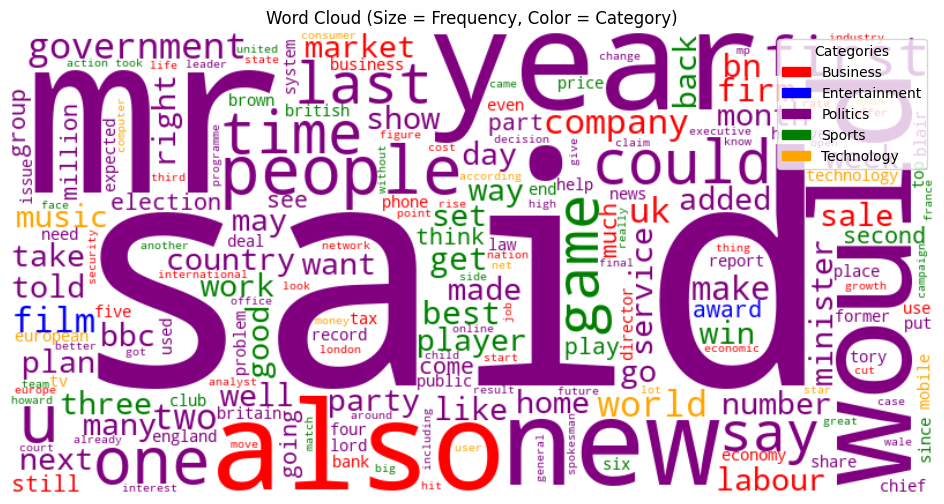

In [557]:
# Decode category labels using label encoder
category_labels = label_encoder.inverse_transform(np.unique(y_train_preprocessed))  # Get original category names

# Define distinct colors for each category
category_colors = {
    category_labels[0]: 'red',
    category_labels[1]: 'blue',
    category_labels[2]: 'purple',
    category_labels[3]: 'green',
    category_labels[4]: 'orange'
}

# Convert frequency dictionary into a usable format
word_freq = {}  # {word: frequency}
word_category = {}  # {word: category (decoded)}

for (word, category), count in freqs.items():
    decoded_category = label_encoder.inverse_transform([category])[0]  # Convert label back to category name
    
    if word in word_freq:
        word_freq[word] += count  # Sum frequencies if word appears in multiple categories
    else:
        word_freq[word] = count
        word_category[word] = decoded_category  # Assign the decoded category to the word

# Custom function to color words based on category
def color_func(word, font_size, position, orientation, random_state=None, **kwargs):
    return category_colors.get(word_category.get(word, 'black'), 'black')  # Default to black if not found

# Generate word cloud
wordcloud = WordCloud(width=800, height=400, background_color='white').generate_from_frequencies(word_freq)

# Plot the word cloud with coloring
plt.figure(figsize=(12, 6))
plt.imshow(wordcloud.recolor(color_func=color_func), interpolation="bilinear")
plt.axis("off")
plt.title("Word Cloud (Size = Frequency, Color = Category)")

# Create legend patches for category colors
legend_patches = [mpatches.Patch(color=color, label=category) for category, color in category_colors.items()]

# Add legend
plt.legend(handles=legend_patches, title="Categories", loc="upper right", fontsize=10, frameon=True)

plt.show()

## EXTRACTING FEATURES FROM FREQUENCY DICTIONARY

In [558]:
y_train["Category"].unique()

array(['Politics', 'Business', 'Sports', 'Technology', 'Entertainment'],
      dtype=object)

In [559]:
def extract_features(article, freqs, categories = [0,1,2,3,4]): 
    # Initialize a feature vector of size (1, len(categories) + 1) [bias term + category counts]
    x = np.zeros((1, len(categories) + 1))

    # Bias term is set to 1
    x[0, 0] = 1  

    # Loop through each word in the processed article
    for word in article.split():
        for i, category in enumerate(categories):
            # Increment word count for the respective category
            x[0, i + 1] += freqs.get((word, category), 0)

    assert x.shape == (1, len(categories) + 1)
    return x

In [560]:
sample = X_train_preprocessed["Article"].iloc[2]
print(f'Sample article:\n{sample}\n')
print(extract_features(sample, freqs))

Sample article:
pension hitch longliving men male life expectancy much higher originally estimated leading pension researcher said pension policy institute ppi said life expectancy unskilled professional men understated life expectancy birth year manual worker year professional gap eight year measured age instead ppi said manual worker live year professional worker year gap five year ppi estimate higher excludes people died reach year age also take account ongoing improvement life expectancy government ruled raising state pension age say would penalise lowerskilled worker generally lower life expectancy chris curry ppi research director said calculation suggested could pressure state pension spending originally envisaged even people social class v unskilled manual worker widely likely lowest life expectancy still expect live year state pension age said researcher updated life expectancy projection woman average live longer men

[[1.0000e+00 1.7340e+04 9.9600e+03 1.8338e+04 9.1710e+03 1

In [561]:
categories = [0,1,2,3,4]

# Initialize feature matrix 'X' with shape (num_samples, num_categories + 1) 
X_train_preprocessed_features = np.zeros((len(X_train_preprocessed), len(categories) + 1))

# Extract features for each article in X_train_preprocessed
for i in range(len(X_train_preprocessed)):
    X_train_preprocessed_features[i, :] = extract_features(X_train_preprocessed["Article"].iloc[i], freqs, categories)

# Print output
print("Feature Matrix Shape:", X_train_preprocessed_features.shape)

Feature Matrix Shape: (1700, 6)


In [562]:
X_train_preprocessed_features[0]

array([1.0000e+00, 2.8130e+04, 1.5760e+04, 4.6777e+04, 1.7785e+04,
       2.7203e+04])

In [563]:
categories = [0,1,2,3,4]

# Initialize feature matrix 'X' with shape (num_samples, num_categories + 1) 
X_test_preprocessed_features = np.zeros((len(X_test_preprocessed), len(categories) + 1))

# Extract features for each article in X_test_preprocessed
for i in range(len(X_test_preprocessed)):
    X_test_preprocessed_features[i, :] = extract_features(X_test_preprocessed["Article"].iloc[i], freqs, categories)

# Print output
print("Feature Matrix Shape:", X_test_preprocessed_features.shape)

Feature Matrix Shape: (426, 6)


In [564]:
X_test_preprocessed_features[0]

array([1.0000e+00, 2.1923e+04, 1.1199e+04, 2.7130e+04, 1.1431e+04,
       1.9079e+04])

## SIMPLE LOGISTIC REGRESSION

In [576]:
clf = LogisticRegression().fit(X_train_preprocessed_features, y_train_preprocessed)

In [578]:
lr_train_score = clf.score(X_train_preprocessed_features, y_train_preprocessed)
lr_test_score = clf.score(X_test_preprocessed_features, y_test_preprocessed)

print("Train accuracy: ", lr_train_score)
print("Test accuracy: ", lr_test_score)

Train accuracy:  0.9664705882352941
Test accuracy:  0.9530516431924883


### Metrics

In [567]:
print(classification_report(y_train_preprocessed, clf.predict(X_train_preprocessed_features), target_names=category_labels))

               precision    recall  f1-score   support

     Business       0.96      0.97      0.96       402
Entertainment       0.97      0.96      0.97       295
     Politics       0.94      0.94      0.94       322
       Sports       0.99      0.99      0.99       403
   Technology       0.96      0.96      0.96       278

     accuracy                           0.97      1700
    macro avg       0.97      0.96      0.97      1700
 weighted avg       0.97      0.97      0.97      1700



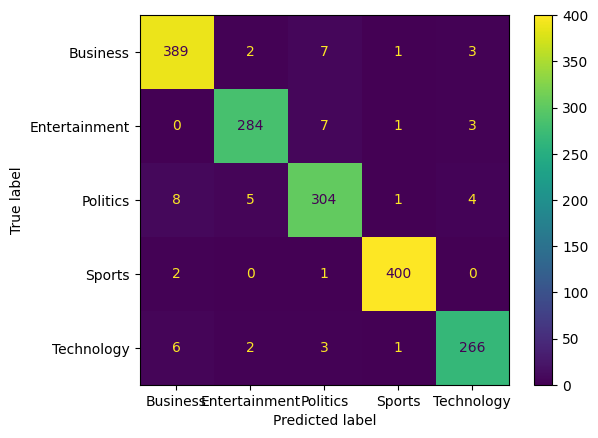

In [568]:
ConfusionMatrixDisplay(confusion_matrix(y_train_preprocessed, clf.predict(X_train_preprocessed_features)),display_labels=label_encoder.inverse_transform([0,1,2,3,4])).plot()

In [569]:
print(classification_report(y_test_preprocessed, clf.predict(X_test_preprocessed_features), target_names=category_labels))

               precision    recall  f1-score   support

     Business       0.90      0.96      0.93       101
Entertainment       0.99      0.97      0.98        74
     Politics       0.95      0.93      0.94        81
       Sports       0.99      1.00      1.00       101
   Technology       0.95      0.88      0.92        69

     accuracy                           0.95       426
    macro avg       0.96      0.95      0.95       426
 weighted avg       0.95      0.95      0.95       426



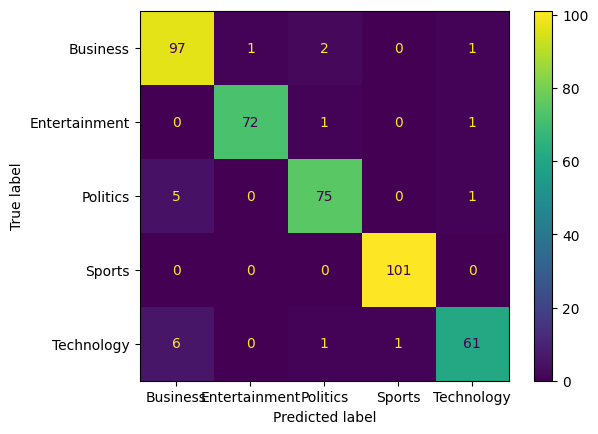

In [570]:
ConfusionMatrixDisplay(confusion_matrix(y_test_preprocessed, clf.predict(X_test_preprocessed_features)),display_labels=category_labels).plot()

**Observation**
> This method is providing good accuracy but it is not good method because
>    1. Huge memory usage by dictionary
>    2. Most words only appear in few categories
>    3. Does not consider word importance across multiple documents
>    4. no context awareness
>    5. poor generalization to new words
>    6. common words like "said, news" appear important in all categories
>    7. Infrequent but highly informative words get ignored
>    8. Not scalable 

# COUNT VECTORIZER AND MODEL TRAINING

## BAG OF WORDS VECTORIZATION

In [571]:
cv = CountVectorizer(stop_words="english",max_features=5000)
X_train_cv = cv.fit_transform(X_train_preprocessed["Article"]).toarray()
y_train_cv = y_train_preprocessed.values

In [572]:
X_test_cv = cv.transform(X_test_preprocessed["Article"]).toarray()
y_test_cv = y_test_preprocessed.values

## TSNE VISUALISATION OF BOW VECTORS

In [650]:
# Apply t-SNE on X_train_cv
tsne = TSNE(n_components=2, random_state=42)  
tsne_features = tsne.fit_transform(X_train_cv)  

# Convert to DataFrame
tsne_df = pd.DataFrame(tsne_features, columns=["C1", "C2"])

# Reset index to align with X_train_preprocessed
X_train_preprocessed = X_train_preprocessed.reset_index(drop=True)

# Decode category labels using LabelEncoder
tsne_df["Category"] = label_encoder.inverse_transform(y_train_cv)  

# Ensure correct color matching
tsne_df["Category"] = pd.Categorical(tsne_df["Category"], categories=category_labels, ordered=True)

# for hover purpose - 1st hunderd characters of the article
tsne_df["Article_100"] = X_train_preprocessed["Article"].str[:100]  

# Plot t-SNE visualization
fig = px.scatter(tsne_df, 
                 x="C1", 
                 y="C2", 
                 hover_data=["Article_100"], 
                 title="t-SNE Visualization of BOW Representation", 
                 color="Category")  

fig.show()


## SIMPLE NAIVE BAYES CLASSIFIER

In [574]:
nb = MultinomialNB()
nb.fit(X_train_cv, y_train_cv)

MultinomialNB()

### Metrics

In [606]:
# Get predictions
y_train_pred = nb.predict(X_train_cv)
y_test_pred = nb.predict(X_test_cv)

# Get probability predictions for ROC-AUC calculation
y_train_prob = nb.predict_proba(X_train_cv)
y_test_prob = nb.predict_proba(X_test_cv)

# Compute all metrics
metrics = {
    "Metric": ["Accuracy", "Precision", "Recall", "F1-score", "ROC-AUC"],
    "Train Score": [
        accuracy_score(y_train_cv, y_train_pred),
        precision_score(y_train_cv, y_train_pred, average='weighted'),
        recall_score(y_train_cv, y_train_pred, average='weighted'),
        f1_score(y_train_cv, y_train_pred, average='weighted'),
        roc_auc_score(y_train_cv, y_train_prob, average='weighted', multi_class="ovr")  # FIXED
    ],
    "Test Score": [
        accuracy_score(y_test_cv, y_test_pred),
        precision_score(y_test_cv, y_test_pred, average='weighted'),
        recall_score(y_test_cv, y_test_pred, average='weighted'),
        f1_score(y_test_cv, y_test_pred, average='weighted'),
        roc_auc_score(y_test_cv, y_test_prob, average='weighted', multi_class="ovr")  # FIXED
    ]
}

# Convert to DataFrame
df_metrics = pd.DataFrame(metrics)

# Print results in a tabular format
print(df_metrics)

      Metric  Train Score  Test Score
0   Accuracy     0.991176    0.974178
1  Precision     0.991264    0.974561
2     Recall     0.991176    0.974178
3   F1-score     0.991186    0.974252
4    ROC-AUC     0.999321    0.998373


In [579]:
print(classification_report(y_train_cv, nb.predict(X_train_cv), target_names=category_labels))

               precision    recall  f1-score   support

     Business       0.99      0.98      0.99       402
Entertainment       1.00      1.00      1.00       295
     Politics       0.99      0.99      0.99       322
       Sports       1.00      1.00      1.00       403
   Technology       0.97      1.00      0.98       278

     accuracy                           0.99      1700
    macro avg       0.99      0.99      0.99      1700
 weighted avg       0.99      0.99      0.99      1700



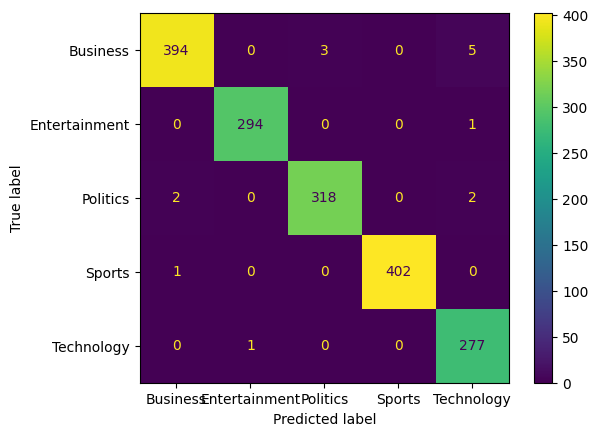

In [582]:
ConfusionMatrixDisplay(confusion_matrix(y_train_cv, nb.predict(X_train_cv)),display_labels=category_labels).plot()

In [584]:
print(classification_report(y_test_cv, nb.predict(X_test_cv), target_names=category_labels))

               precision    recall  f1-score   support

     Business       0.94      0.97      0.96       101
Entertainment       0.99      0.96      0.97        74
     Politics       0.99      0.96      0.97        81
       Sports       1.00      1.00      1.00       101
   Technology       0.96      0.97      0.96        69

     accuracy                           0.97       426
    macro avg       0.97      0.97      0.97       426
 weighted avg       0.97      0.97      0.97       426



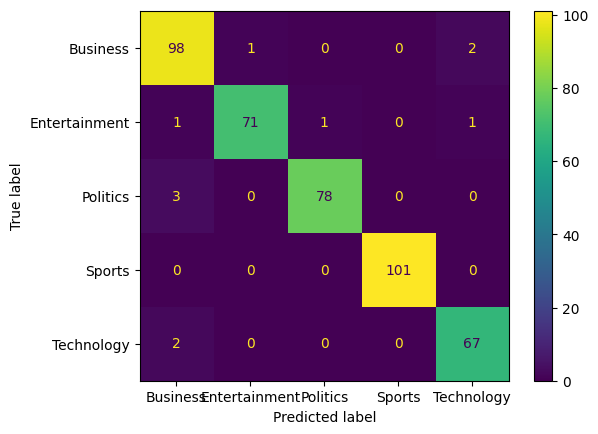

In [585]:
ConfusionMatrixDisplay(confusion_matrix(y_test_cv, nb.predict(X_test_cv)),display_labels=category_labels).plot()

## FUNCTION FOR ML MODEL TRAINING AND EVALUATION

In [691]:
def model_training_and_evaluation(model, param_grid, X_train, y_train, X_test, y_test, category_labels, run_name, cv=5, n_iter=20):
    # Set the MLflow experiment
    mlflow.set_experiment("news_article_document_classification")

    # Start a new MLflow run with the provided run name
    with mlflow.start_run(run_name=run_name):
        # Perform hyperparameter tuning using RandomizedSearchCV
        search = RandomizedSearchCV(model, param_distributions=param_grid, n_iter=n_iter, cv=cv, scoring='accuracy', n_jobs=-1, verbose=1, random_state=42)
        search.fit(X_train, y_train)

        # Get the best model after tuning
        best_model = search.best_estimator_
        best_params = search.best_params_

        # Predictions
        y_train_pred = best_model.predict(X_train)
        y_test_pred = best_model.predict(X_test)

        # Probability Predictions for ROC-AUC
        y_train_prob = best_model.predict_proba(X_train)
        y_test_prob = best_model.predict_proba(X_test)

        # Compute training metrics
        train_metrics = {
            "Accuracy": accuracy_score(y_train, y_train_pred),
            "Precision": precision_score(y_train, y_train_pred, average='weighted'),
            "Recall": recall_score(y_train, y_train_pred, average='weighted'),
            "F1-score": f1_score(y_train, y_train_pred, average='weighted'),
            "ROC-AUC": roc_auc_score(y_train, y_train_prob, average='weighted', multi_class="ovr")
        }

        # Compute testing metrics
        test_metrics = {
            "Accuracy": accuracy_score(y_test, y_test_pred),
            "Precision": precision_score(y_test, y_test_pred, average='weighted'),
            "Recall": recall_score(y_test, y_test_pred, average='weighted'),
            "F1-score": f1_score(y_test, y_test_pred, average='weighted'),
            "ROC-AUC": roc_auc_score(y_test, y_test_prob, average='weighted', multi_class="ovr")
        }

        # Log model parameters & metrics to MLflow
        mlflow.log_params(best_params)
        mlflow.log_metrics({f"train_{k}": v for k, v in train_metrics.items()})  # Log training metrics with 'train_' prefix
        mlflow.log_metrics({f"test_{k}": v for k, v in test_metrics.items()})    # Log test metrics with 'test_' prefix
        mlflow.sklearn.log_model(best_model, "best_model")

        # Print best hyperparameters
        print("\n Best Hyperparameters:", best_params)

        # Convert metrics to DataFrame for display
        df_train_metrics = pd.DataFrame([train_metrics])
        df_test_metrics = pd.DataFrame([test_metrics])
        print("\n Training Metrics:")
        print(df_train_metrics)

        print("\n Testing Metrics:")
        print(df_test_metrics)

        # Print classification reports
        print("\n Training Classification Report:")
        print(classification_report(y_train, y_train_pred, target_names=category_labels))

        print("\n Testing Classification Report:")
        print(classification_report(y_test, y_test_pred, target_names=category_labels))

        # Plot Confusion Matrices
        fig, axes = plt.subplots(1, 2, figsize=(14, 5))

        sns.heatmap(confusion_matrix(y_train, y_train_pred), annot=True, fmt='d', cmap='Blues', xticklabels=category_labels, yticklabels=category_labels, ax=axes[0])
        axes[0].set_title("Train Confusion Matrix")

        sns.heatmap(confusion_matrix(y_test, y_test_pred), annot=True, fmt='d', cmap='Oranges', xticklabels=category_labels, yticklabels=category_labels, ax=axes[1])
        axes[1].set_title("Test Confusion Matrix")

        # Save confusion matrix plot as an artifact
        plt.savefig("confusion_matrix.png")
        mlflow.log_artifact("confusion_matrix.png")
        plt.show()

        print("\n Model & Results Logged in MLflow!")

        return best_model  # Return the trained model


Fitting 5 folds for each of 4 candidates, totalling 20 fits


2025/02/06 23:22:40 WARNING mlflow.utils.environment: Encountered an unexpected error while inferring pip requirements (model URI: C:\Users\saina\AppData\Local\Temp\tmprgf00tkc\model\model.pkl, flavor: sklearn). Fall back to return ['scikit-learn==1.5.1', 'cloudpickle==3.1.1']. Set logging level to DEBUG to see the full traceback. 



 Best Hyperparameters: {'alpha': 0.5}

 Training Metrics:
   Accuracy  Precision    Recall  F1-score   ROC-AUC
0  0.991176   0.991264  0.991176  0.991186  0.999438

 Testing Metrics:
   Accuracy  Precision    Recall  F1-score   ROC-AUC
0  0.974178   0.974684  0.974178  0.974304  0.998358

 Training Classification Report:
               precision    recall  f1-score   support

     Business       0.99      0.98      0.99       402
Entertainment       1.00      1.00      1.00       295
     Politics       0.99      0.99      0.99       322
       Sports       1.00      1.00      1.00       403
   Technology       0.97      1.00      0.98       278

     accuracy                           0.99      1700
    macro avg       0.99      0.99      0.99      1700
 weighted avg       0.99      0.99      0.99      1700


 Testing Classification Report:
               precision    recall  f1-score   support

     Business       0.94      0.96      0.95       101
Entertainment       0.99      0.97

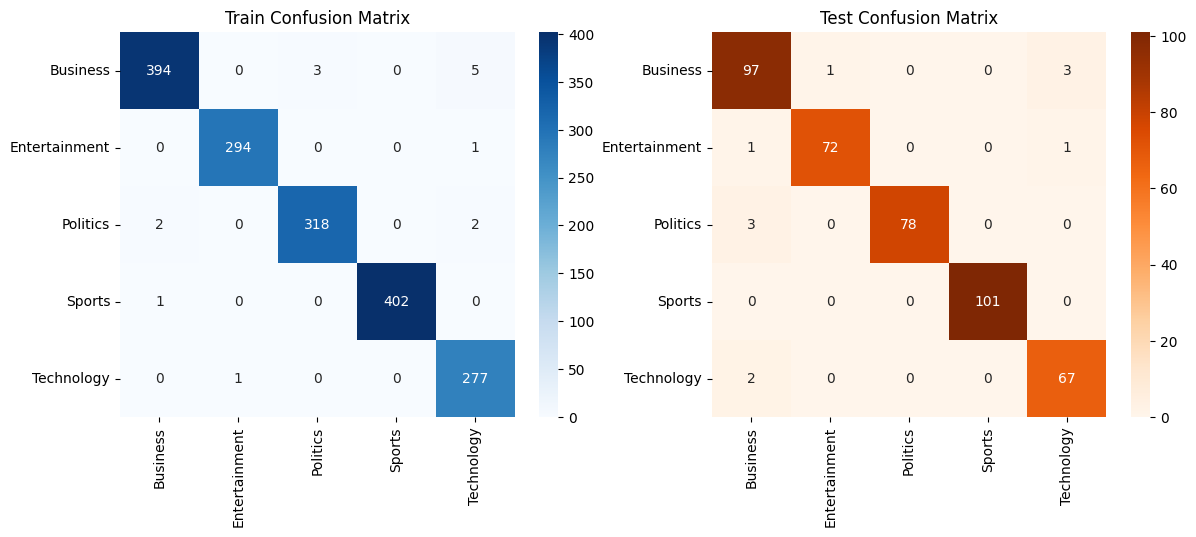


 Model & Results Logged in MLflow!


In [695]:
nb = MultinomialNB()
param_grid = {"alpha" : [0.1, 0.5, 1.0, 2.0]}
best_nb_cv_model = model_training_and_evaluation(nb, param_grid,X_train_cv, y_train_cv, X_test_cv, y_test_cv, category_labels,run_name = "MultinomialNB CV")

## DECISION TREE CLASSIFIER

Fitting 5 folds for each of 20 candidates, totalling 100 fits


2025/02/06 23:23:01 WARNING mlflow.utils.environment: Encountered an unexpected error while inferring pip requirements (model URI: C:\Users\saina\AppData\Local\Temp\tmpm5ebxpui\model\model.pkl, flavor: sklearn). Fall back to return ['scikit-learn==1.5.1', 'cloudpickle==3.1.1']. Set logging level to DEBUG to see the full traceback. 



 Best Hyperparameters: {'min_samples_split': 20, 'min_samples_leaf': 2, 'max_leaf_nodes': None, 'max_depth': 30, 'criterion': 'gini', 'class_weight': 'balanced'}

 Training Metrics:
   Accuracy  Precision    Recall  F1-score   ROC-AUC
0  0.956471   0.957092  0.956471  0.956603  0.998481

 Testing Metrics:
   Accuracy  Precision    Recall  F1-score   ROC-AUC
0  0.819249   0.823063  0.819249  0.819427  0.918991

 Training Classification Report:
               precision    recall  f1-score   support

     Business       0.94      0.96      0.95       402
Entertainment       0.97      0.94      0.96       295
     Politics       0.94      0.94      0.94       322
       Sports       1.00      0.97      0.98       403
   Technology       0.93      0.97      0.95       278

     accuracy                           0.96      1700
    macro avg       0.96      0.96      0.96      1700
 weighted avg       0.96      0.96      0.96      1700


 Testing Classification Report:
               precis

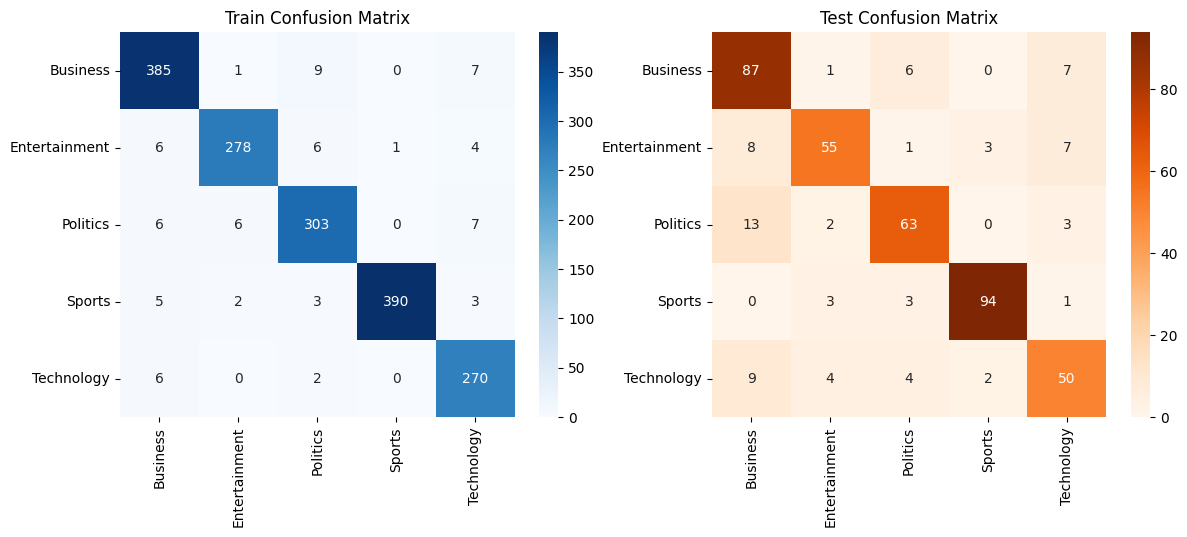


 Model & Results Logged in MLflow!


In [696]:
dt = DecisionTreeClassifier(random_state=42)
param_grid = {
    'criterion': ['gini', 'entropy'],  # Function to measure the quality of a split
    'max_depth': [None, 10, 20, 30, 40, 50],  # The maximum depth of the tree
    'min_samples_split': [2, 5, 10, 20],  # The minimum number of samples required to split an internal node
    'min_samples_leaf': [1, 2, 4, 10],   # The minimum number of samples required to be at a leaf node
    'max_leaf_nodes': [None, 10, 20, 30],  # Grow a tree with max_leaf_nodes in best-first fashion
    'class_weight': ['balanced'],  # Weights associated with classes
}
best_dt_cv_model = model_training_and_evaluation(dt,param_grid, X_train_cv, y_train_cv, X_test_cv, y_test_cv, category_labels,run_name="DecisionTree_CV")

## NEAREST NEIGHBORS CLASSIFIER

Fitting 5 folds for each of 20 candidates, totalling 100 fits


2025/02/06 23:26:53 WARNING mlflow.utils.environment: Encountered an unexpected error while inferring pip requirements (model URI: C:\Users\saina\AppData\Local\Temp\tmpk0isdgpa\model\model.pkl, flavor: sklearn). Fall back to return ['scikit-learn==1.5.1', 'cloudpickle==3.1.1']. Set logging level to DEBUG to see the full traceback. 



 Best Hyperparameters: {'p': 2, 'n_neighbors': 3, 'n_jobs': -1, 'metric': 'euclidean'}

 Training Metrics:
   Accuracy  Precision    Recall  F1-score   ROC-AUC
0  0.867059   0.882567  0.867059  0.864255  0.994815

 Testing Metrics:
   Accuracy  Precision  Recall  F1-score   ROC-AUC
0    0.7723   0.829554  0.7723  0.768639  0.928263

 Training Classification Report:
               precision    recall  f1-score   support

     Business       0.82      0.93      0.87       402
Entertainment       0.91      0.87      0.89       295
     Politics       0.96      0.82      0.88       322
       Sports       0.80      1.00      0.89       403
   Technology       0.99      0.64      0.78       278

     accuracy                           0.87      1700
    macro avg       0.89      0.85      0.86      1700
 weighted avg       0.88      0.87      0.86      1700


 Testing Classification Report:
               precision    recall  f1-score   support

     Business       0.77      0.88      0.82

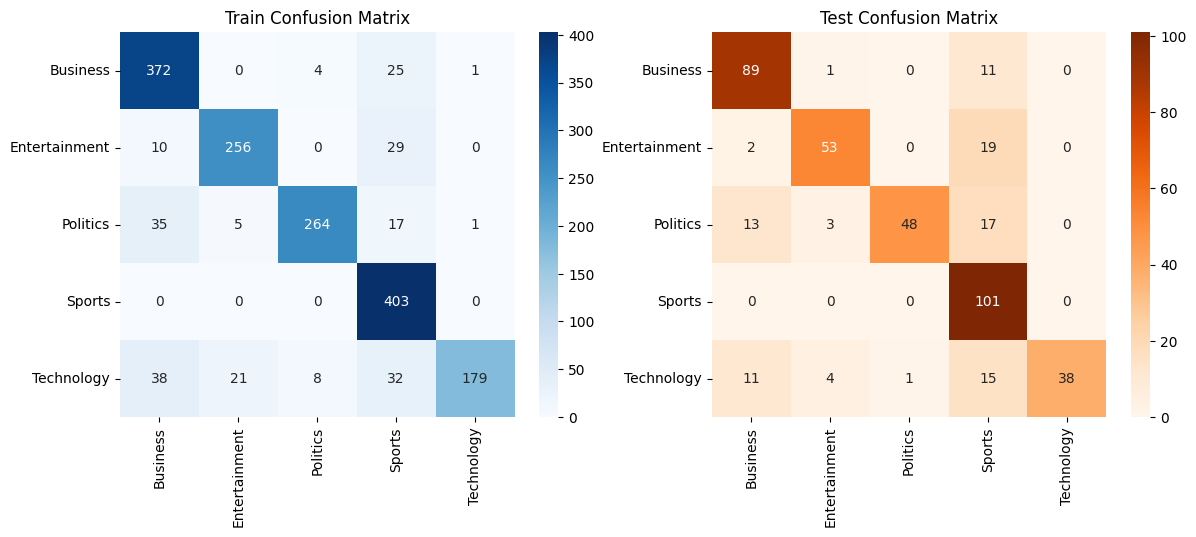


 Model & Results Logged in MLflow!


In [698]:
knn = KNeighborsClassifier()
param_grid = {
    'n_neighbors': [3, 5, 7, 9, 11, 15, 20],  # The number of neighbors to use for kneighbors queries
    'p': [1, 2],  # Power parameter for the Minkowski distance
    'metric': ['minkowski', 'euclidean', 'manhattan'],  # Distance metric to use
    'n_jobs': [-1]  # Number of jobs to run in parallel
}
best_knn_cv_model = model_training_and_evaluation(knn, param_grid,X_train_cv, y_train_cv, X_test_cv, y_test_cv, category_labels,run_name = "KNN_CV")

## RANDOM FOREST CLASSIFIER

Fitting 5 folds for each of 20 candidates, totalling 100 fits


2025/02/06 23:31:16 WARNING mlflow.utils.environment: Encountered an unexpected error while inferring pip requirements (model URI: C:\Users\saina\AppData\Local\Temp\tmpwv4p4ryy\model\model.pkl, flavor: sklearn). Fall back to return ['scikit-learn==1.5.1', 'cloudpickle==3.1.1']. Set logging level to DEBUG to see the full traceback. 



 Best Hyperparameters: {'n_estimators': 150, 'min_samples_split': 5, 'min_samples_leaf': 1, 'max_depth': 20}

 Training Metrics:
   Accuracy  Precision    Recall  F1-score   ROC-AUC
0  0.999412   0.999413  0.999412  0.999412  0.999994

 Testing Metrics:
   Accuracy  Precision    Recall  F1-score   ROC-AUC
0  0.964789   0.965696  0.964789   0.96486  0.998434

 Training Classification Report:
               precision    recall  f1-score   support

     Business       1.00      1.00      1.00       402
Entertainment       1.00      1.00      1.00       295
     Politics       1.00      1.00      1.00       322
       Sports       1.00      1.00      1.00       403
   Technology       1.00      1.00      1.00       278

     accuracy                           1.00      1700
    macro avg       1.00      1.00      1.00      1700
 weighted avg       1.00      1.00      1.00      1700


 Testing Classification Report:
               precision    recall  f1-score   support

     Business     

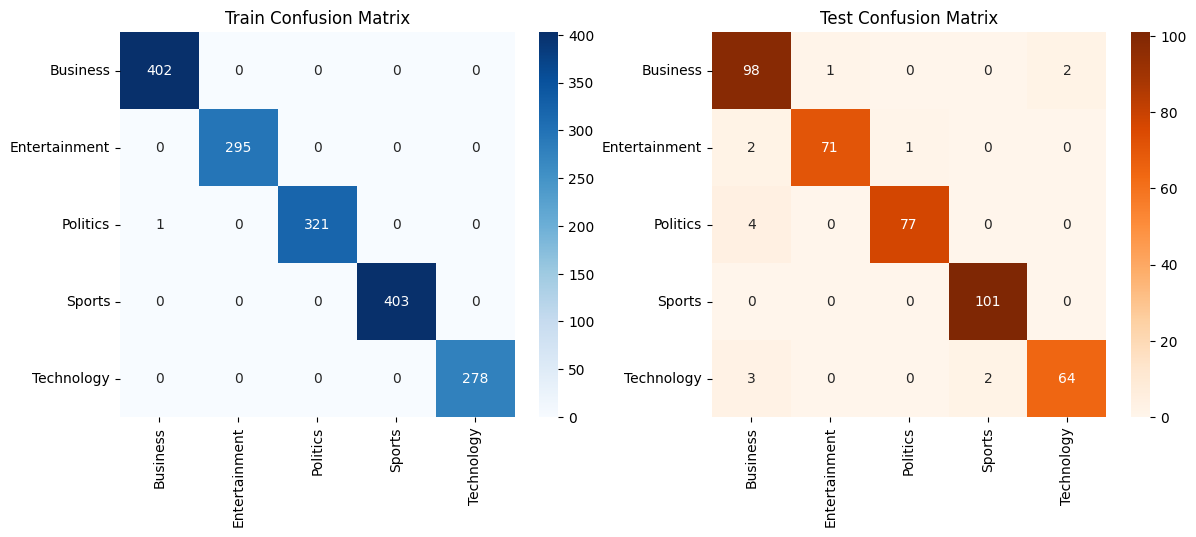


 Model & Results Logged in MLflow!


In [700]:
rf = RandomForestClassifier()
param_grid ={
    'n_estimators': [50, 100, 150, 200],  # Number of trees in the forest
    'max_depth': [None, 10, 20, 30],  # Maximum depth of the tree
    'min_samples_split': [2, 5, 10],  # Minimum number of samples required to split an internal node
    'min_samples_leaf': [1, 2, 4],  # Minimum number of samples required to be at a leaf node
}
best_rf_cv_model = model_training_and_evaluation(rf,param_grid, X_train_cv, y_train_cv, X_test_cv, y_test_cv, category_labels,cv = 5, n_iter = 20, run_name="RandomForest_CV")


## GRADIENT BOOSTING CLASSIFIER

Fitting 3 folds for each of 2 candidates, totalling 6 fits


2025/02/06 23:46:35 WARNING mlflow.utils.environment: Encountered an unexpected error while inferring pip requirements (model URI: C:\Users\saina\AppData\Local\Temp\tmpr621ux3m\model\model.pkl, flavor: sklearn). Fall back to return ['scikit-learn==1.5.1', 'cloudpickle==3.1.1']. Set logging level to DEBUG to see the full traceback. 



 Best Hyperparameters: {'n_estimators': 200, 'min_samples_split': 2, 'min_samples_leaf': 1, 'max_depth': 3, 'learning_rate': 0.2}

 Training Metrics:
   Accuracy  Precision  Recall  F1-score  ROC-AUC
0       1.0        1.0     1.0       1.0      1.0

 Testing Metrics:
   Accuracy  Precision    Recall  F1-score   ROC-AUC
0  0.955399   0.955891  0.955399  0.955487  0.998507

 Training Classification Report:
               precision    recall  f1-score   support

     Business       1.00      1.00      1.00       402
Entertainment       1.00      1.00      1.00       295
     Politics       1.00      1.00      1.00       322
       Sports       1.00      1.00      1.00       403
   Technology       1.00      1.00      1.00       278

     accuracy                           1.00      1700
    macro avg       1.00      1.00      1.00      1700
 weighted avg       1.00      1.00      1.00      1700


 Testing Classification Report:
               precision    recall  f1-score   support

   

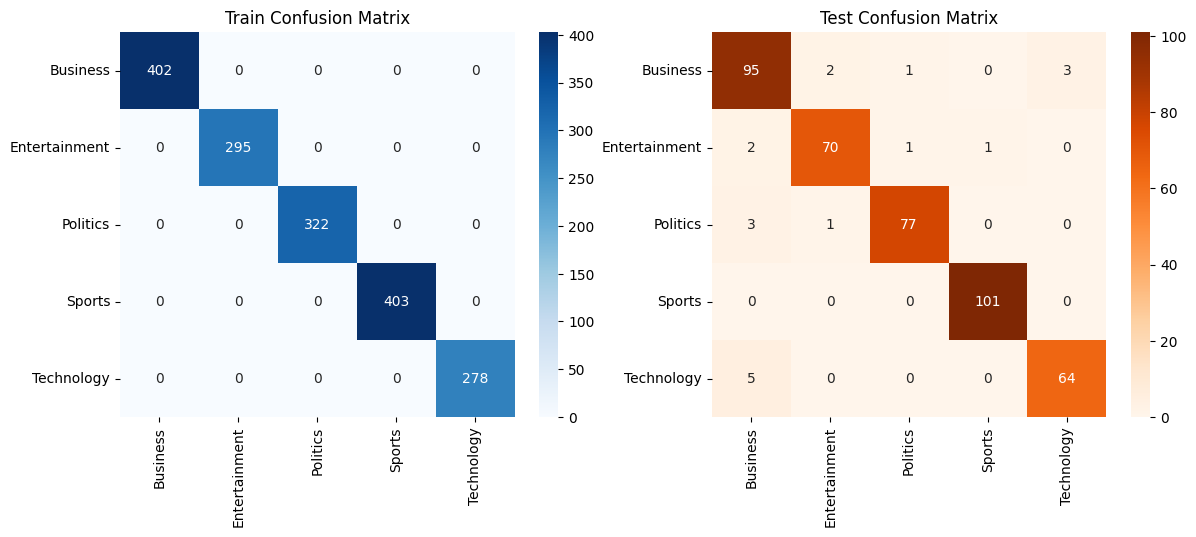


 Model & Results Logged in MLflow!


In [701]:
gbdt = GradientBoostingClassifier()
param_grid ={
    'n_estimators': [50, 100, 150, 200],  # Number of boosting stages to be run
    'learning_rate': [0.001, 0.01, 0.1, 0.2],  # Step size for each iteration, trade-off between model complexity and learning speed
    'max_depth': [3, 5, 7, 10],  # Maximum depth of individual trees
    'min_samples_split': [2, 5, 10],  # Minimum number of samples required to split an internal node
    'min_samples_leaf': [1, 2, 4],  # Minimum number of samples required at a leaf node
}
best_gbdt_cv_model = model_training_and_evaluation(gbdt,param_grid, X_train_cv, y_train_cv, X_test_cv, y_test_cv, category_labels,cv = 3, n_iter = 2, run_name="gbdt_cv")

# UNIGRAM TF_IDF VECTORIZER AND MODEL TRAINING

## UNIGRAM TF_IDF VECTORIZATION

In [652]:
tf_idf_uni = TfidfVectorizer(stop_words="english",max_features=5000,)
X_train_tf_idf_uni = tf_idf_uni.fit_transform(X_train_preprocessed["Article"]).toarray()
y_train_tf_idf_uni = y_train_preprocessed.values

In [653]:
X_test_tf_idf_uni = tf_idf_uni.transform(X_test_preprocessed["Article"]).toarray()
y_test_tf_idf_uni = y_test_preprocessed.values

## TSNE VISUALISATION OF TF_IDF UNIGRAM VECTORS

In [655]:
# Apply t-SNE on X_train_tf_idf_uni
tsne = TSNE(n_components=2, random_state=42)  
tsne_features = tsne.fit_transform(X_train_tf_idf_uni)  

# Convert to DataFrame
tsne_df = pd.DataFrame(tsne_features, columns=["C1", "C2"])

# Reset index to align with X_train_preprocessed
X_train_preprocessed = X_train_preprocessed.reset_index(drop=True)

# Decode category labels using LabelEncoder
tsne_df["Category"] = label_encoder.inverse_transform(y_train_tf_idf_uni)  

# Ensure correct color matching
tsne_df["Category"] = pd.Categorical(tsne_df["Category"], categories=category_labels, ordered=True)

# for hover purpose - 1st hunderd characters of the article
tsne_df["Article_100"] = X_train_preprocessed["Article"].str[:100]  

# Plot t-SNE visualization
fig = px.scatter(tsne_df, 
                 x="C1", 
                 y="C2", 
                 hover_data=["Article_100"], 
                 title="t-SNE Visualization of TF_IDF_UNIGRAM Representation", 
                 color="Category")  

fig.show()

## SIMPLE NAIVE BAYES CLASSIFIER

Fitting 5 folds for each of 4 candidates, totalling 20 fits


2025/02/06 23:46:42 WARNING mlflow.utils.environment: Encountered an unexpected error while inferring pip requirements (model URI: C:\Users\saina\AppData\Local\Temp\tmpuy543opb\model\model.pkl, flavor: sklearn). Fall back to return ['scikit-learn==1.5.1', 'cloudpickle==3.1.1']. Set logging level to DEBUG to see the full traceback. 



 Best Hyperparameters: {'alpha': 0.5}

 Training Metrics:
   Accuracy  Precision    Recall  F1-score   ROC-AUC
0  0.991765   0.991774  0.991765  0.991765  0.999795

 Testing Metrics:
   Accuracy  Precision    Recall  F1-score   ROC-AUC
0  0.971831   0.972112  0.971831  0.971772  0.999235

 Training Classification Report:
               precision    recall  f1-score   support

     Business       0.99      0.99      0.99       402
Entertainment       1.00      1.00      1.00       295
     Politics       0.99      0.99      0.99       322
       Sports       1.00      1.00      1.00       403
   Technology       0.98      0.99      0.99       278

     accuracy                           0.99      1700
    macro avg       0.99      0.99      0.99      1700
 weighted avg       0.99      0.99      0.99      1700


 Testing Classification Report:
               precision    recall  f1-score   support

     Business       0.94      0.98      0.96       101
Entertainment       0.99      0.96

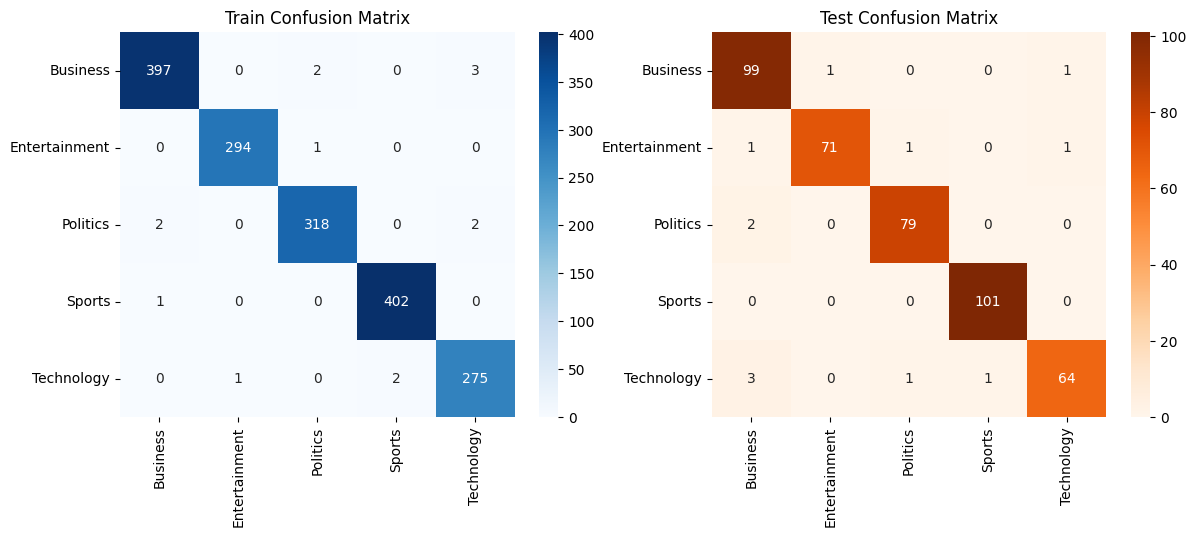


 Model & Results Logged in MLflow!


In [702]:
nb = MultinomialNB()
param_grid = {"alpha" : [0.1, 0.5, 1.0, 2.0]}
best_nb_tf_idf_uni_model = model_training_and_evaluation(nb, param_grid,X_train_tf_idf_uni, y_train_tf_idf_uni, X_test_tf_idf_uni, y_test_tf_idf_uni, category_labels,run_name = "MultinomialNB tf_idf_uni")

## DECISION TREE CLASSIFIER

Fitting 5 folds for each of 20 candidates, totalling 100 fits


2025/02/06 23:47:03 WARNING mlflow.utils.environment: Encountered an unexpected error while inferring pip requirements (model URI: C:\Users\saina\AppData\Local\Temp\tmpg3_tk6ri\model\model.pkl, flavor: sklearn). Fall back to return ['scikit-learn==1.5.1', 'cloudpickle==3.1.1']. Set logging level to DEBUG to see the full traceback. 



 Best Hyperparameters: {'min_samples_split': 5, 'min_samples_leaf': 4, 'max_leaf_nodes': None, 'max_depth': 40, 'criterion': 'gini', 'class_weight': 'balanced'}

 Training Metrics:
   Accuracy  Precision    Recall  F1-score  ROC-AUC
0  0.931176   0.931928  0.931176  0.931289  0.99692

 Testing Metrics:
   Accuracy  Precision    Recall  F1-score   ROC-AUC
0  0.830986   0.831244  0.830986  0.830966  0.922558

 Training Classification Report:
               precision    recall  f1-score   support

     Business       0.94      0.92      0.93       402
Entertainment       0.92      0.93      0.92       295
     Politics       0.92      0.91      0.92       322
       Sports       0.97      0.94      0.95       403
   Technology       0.90      0.96      0.93       278

     accuracy                           0.93      1700
    macro avg       0.93      0.93      0.93      1700
 weighted avg       0.93      0.93      0.93      1700


 Testing Classification Report:
               precision

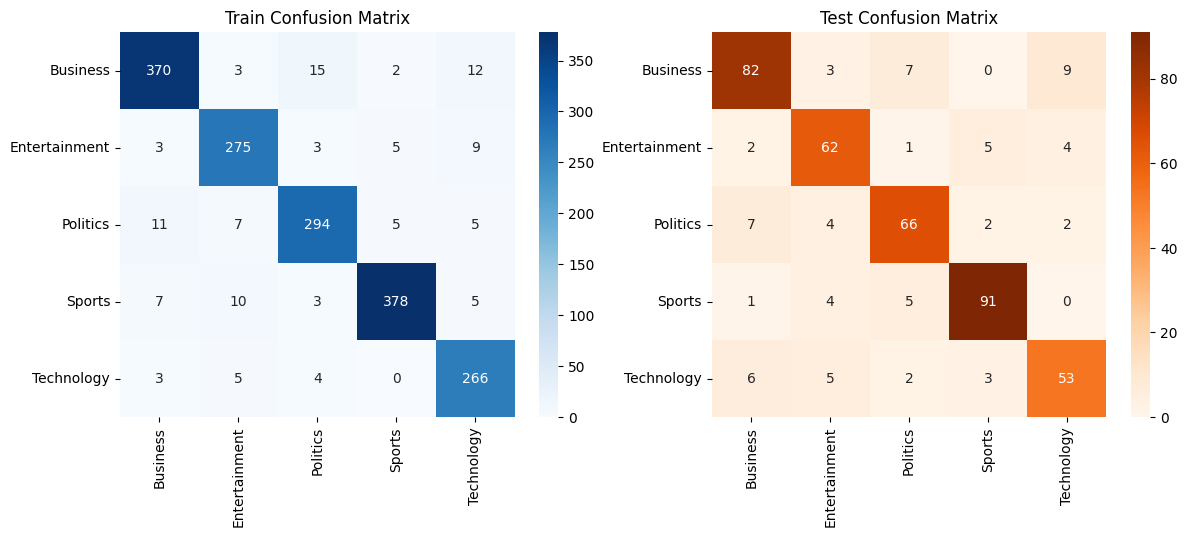


 Model & Results Logged in MLflow!


In [703]:
dt = DecisionTreeClassifier(random_state=42)
param_grid = {
    'criterion': ['gini', 'entropy'],  # Function to measure the quality of a split
    'max_depth': [None, 10, 20, 30, 40, 50],  # The maximum depth of the tree
    'min_samples_split': [2, 5, 10, 20],  # The minimum number of samples required to split an internal node
    'min_samples_leaf': [1, 2, 4, 10],   # The minimum number of samples required to be at a leaf node
    'max_leaf_nodes': [None, 10, 20, 30],  # Grow a tree with max_leaf_nodes in best-first fashion
    'class_weight': ['balanced'],  # Weights associated with classes
}
best_dt_tf_idf_uni_model = model_training_and_evaluation(dt,param_grid, X_train_tf_idf_uni, y_train_tf_idf_uni, X_test_tf_idf_uni, y_test_tf_idf_uni, category_labels,run_name="DecisionTree_tf_idf_uni")

## NEAREST NEIGHBORS CLASSIFIER

Fitting 5 folds for each of 20 candidates, totalling 100 fits


2025/02/06 23:47:38 WARNING mlflow.utils.environment: Encountered an unexpected error while inferring pip requirements (model URI: C:\Users\saina\AppData\Local\Temp\tmpdaiqcu1m\model\model.pkl, flavor: sklearn). Fall back to return ['scikit-learn==1.5.1', 'cloudpickle==3.1.1']. Set logging level to DEBUG to see the full traceback. 



 Best Hyperparameters: {'p': 2, 'n_neighbors': 20, 'n_jobs': -1, 'metric': 'minkowski'}

 Training Metrics:
   Accuracy  Precision    Recall  F1-score   ROC-AUC
0  0.950588   0.951086  0.950588  0.950583  0.996829

 Testing Metrics:
   Accuracy  Precision    Recall  F1-score   ROC-AUC
0  0.957746   0.958834  0.957746  0.957611  0.998362

 Training Classification Report:
               precision    recall  f1-score   support

     Business       0.96      0.92      0.94       402
Entertainment       0.96      0.95      0.95       295
     Politics       0.91      0.95      0.93       322
       Sports       0.98      0.99      0.99       403
   Technology       0.93      0.94      0.93       278

     accuracy                           0.95      1700
    macro avg       0.95      0.95      0.95      1700
 weighted avg       0.95      0.95      0.95      1700


 Testing Classification Report:
               precision    recall  f1-score   support

     Business       0.96      0.91     

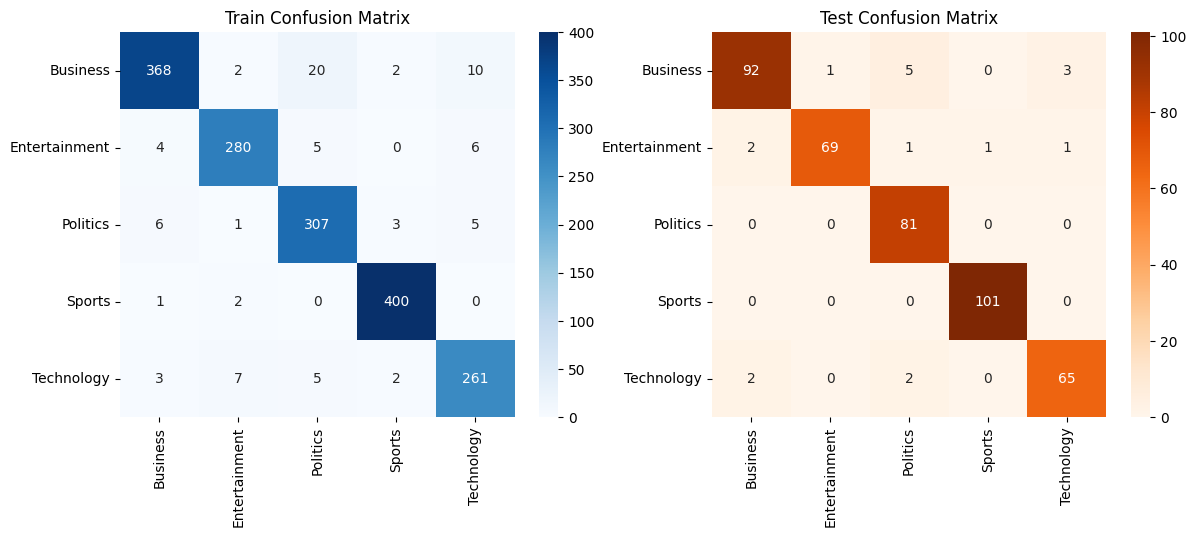


 Model & Results Logged in MLflow!


In [704]:
knn = KNeighborsClassifier()
param_grid = {
    'n_neighbors': [3, 5, 7, 9, 11, 15, 20],  # The number of neighbors to use for kneighbors queries
    'p': [1, 2],  # Power parameter for the Minkowski distance
    'metric': ['minkowski', 'euclidean', 'manhattan'],  # Distance metric to use
    'n_jobs': [-1]  # Number of jobs to run in parallel
}
best_knn_tf_idf_uni_model = model_training_and_evaluation(knn, param_grid,X_train_tf_idf_uni, y_train_tf_idf_uni, X_test_tf_idf_uni, y_test_tf_idf_uni, category_labels,run_name = "KNN_tf_idf_uni")

## RANDOM FOREST CLASSIFIER

Fitting 5 folds for each of 20 candidates, totalling 100 fits


2025/02/06 23:48:17 WARNING mlflow.utils.environment: Encountered an unexpected error while inferring pip requirements (model URI: C:\Users\saina\AppData\Local\Temp\tmpbi1lhkzg\model\model.pkl, flavor: sklearn). Fall back to return ['scikit-learn==1.5.1', 'cloudpickle==3.1.1']. Set logging level to DEBUG to see the full traceback. 



 Best Hyperparameters: {'n_estimators': 100, 'min_samples_split': 2, 'min_samples_leaf': 1, 'max_depth': 20}

 Training Metrics:
   Accuracy  Precision    Recall  F1-score   ROC-AUC
0  0.999412   0.999413  0.999412  0.999412  0.999998

 Testing Metrics:
   Accuracy  Precision    Recall  F1-score   ROC-AUC
0  0.943662   0.946625  0.943662  0.943809  0.998266

 Training Classification Report:
               precision    recall  f1-score   support

     Business       1.00      1.00      1.00       402
Entertainment       1.00      1.00      1.00       295
     Politics       1.00      1.00      1.00       322
       Sports       1.00      1.00      1.00       403
   Technology       1.00      1.00      1.00       278

     accuracy                           1.00      1700
    macro avg       1.00      1.00      1.00      1700
 weighted avg       1.00      1.00      1.00      1700


 Testing Classification Report:
               precision    recall  f1-score   support

     Business     

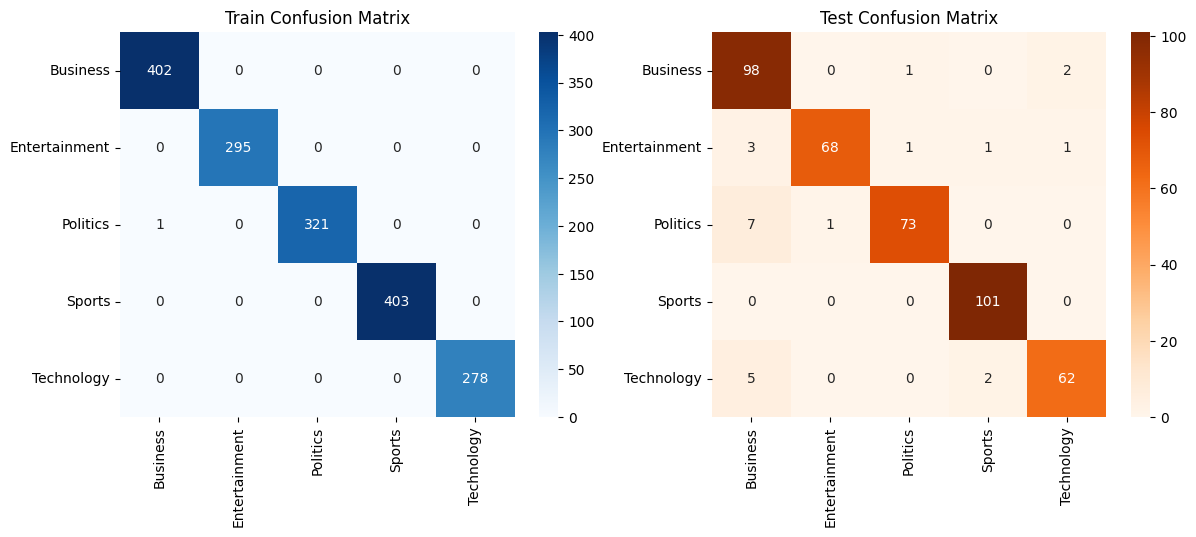


 Model & Results Logged in MLflow!


In [705]:
rf = RandomForestClassifier()
param_grid ={
    'n_estimators': [50, 100, 150, 200],  # Number of trees in the forest
    'max_depth': [None, 10, 20, 30],  # Maximum depth of the tree
    'min_samples_split': [2, 5, 10],  # Minimum number of samples required to split an internal node
    'min_samples_leaf': [1, 2, 4],  # Minimum number of samples required to be at a leaf node
}
best_rf_tf_idf_uni_model = model_training_and_evaluation(rf,param_grid, X_train_tf_idf_uni, y_train_tf_idf_uni, X_test_tf_idf_uni, y_test_tf_idf_uni, category_labels,cv = 5, n_iter = 20, run_name="RandomForest_tf_idf_uni")


## GRADIENT BOOSTING CLASSIFIER

Fitting 3 folds for each of 2 candidates, totalling 6 fits


2025/02/07 00:03:09 WARNING mlflow.utils.environment: Encountered an unexpected error while inferring pip requirements (model URI: C:\Users\saina\AppData\Local\Temp\tmptjc3qv2p\model\model.pkl, flavor: sklearn). Fall back to return ['scikit-learn==1.5.1', 'cloudpickle==3.1.1']. Set logging level to DEBUG to see the full traceback. 



 Best Hyperparameters: {'n_estimators': 200, 'min_samples_split': 2, 'min_samples_leaf': 1, 'max_depth': 3, 'learning_rate': 0.2}

 Training Metrics:
   Accuracy  Precision  Recall  F1-score  ROC-AUC
0       1.0        1.0     1.0       1.0      1.0

 Testing Metrics:
   Accuracy  Precision    Recall  F1-score   ROC-AUC
0  0.964789   0.966433  0.964789  0.964834  0.998197

 Training Classification Report:
               precision    recall  f1-score   support

     Business       1.00      1.00      1.00       402
Entertainment       1.00      1.00      1.00       295
     Politics       1.00      1.00      1.00       322
       Sports       1.00      1.00      1.00       403
   Technology       1.00      1.00      1.00       278

     accuracy                           1.00      1700
    macro avg       1.00      1.00      1.00      1700
 weighted avg       1.00      1.00      1.00      1700


 Testing Classification Report:
               precision    recall  f1-score   support

   

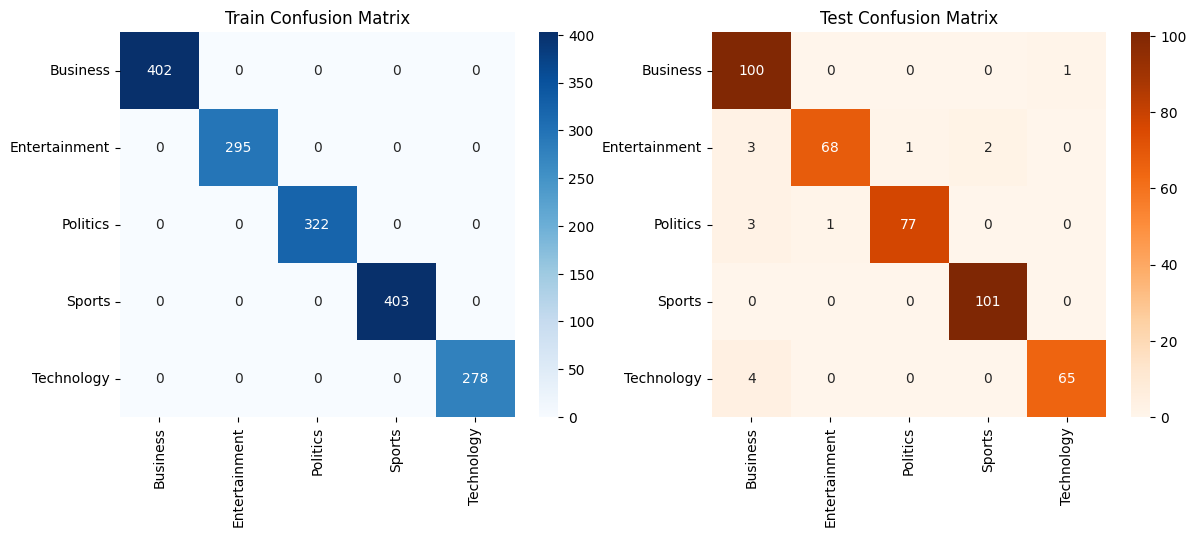


 Model & Results Logged in MLflow!


In [706]:
gbdt = GradientBoostingClassifier()
param_grid ={
    'n_estimators': [50, 100, 150, 200],  # Number of boosting stages to be run
    'learning_rate': [0.001, 0.01, 0.1, 0.2],  # Step size for each iteration, trade-off between model complexity and learning speed
    'max_depth': [3, 5, 7, 10],  # Maximum depth of individual trees
    'min_samples_split': [2, 5, 10],  # Minimum number of samples required to split an internal node
    'min_samples_leaf': [1, 2, 4],  # Minimum number of samples required at a leaf node
}
best_gbdt_tf_idf_uni_model = model_training_and_evaluation(gbdt,param_grid, X_train_tf_idf_uni, y_train_tf_idf_uni, X_test_tf_idf_uni, y_test_tf_idf_uni, category_labels,cv = 3, n_iter = 2, run_name="gbdt_tf_idf_uni")

# BIGRAM TF_IDF VECTORIZER AND MODEL TRAINING

## UNIGRAM TF_IDF VECTORIZATION

In [707]:
tf_idf_bi = TfidfVectorizer(stop_words="english",max_features=5000,ngram_range=(1,2))
X_train_tf_idf_bi = tf_idf_bi.fit_transform(X_train_preprocessed["Article"]).toarray()
y_train_tf_idf_bi = y_train_preprocessed.values

In [708]:
X_test_tf_idf_bi = tf_idf_bi.transform(X_test_preprocessed["Article"]).toarray()
y_test_tf_idf_bi = y_test_preprocessed.values

## TSNE VISUALISATION OF TF_IDF BIGRAM VECTORS

In [709]:
# Apply t-SNE on X_train_tf_idf_bi
tsne = TSNE(n_components=2, random_state=42)  
tsne_features = tsne.fit_transform(X_train_tf_idf_bi)  

# Convert to DataFrame
tsne_df = pd.DataFrame(tsne_features, columns=["C1", "C2"])

# Reset index to align with X_train_preprocessed
X_train_preprocessed = X_train_preprocessed.reset_index(drop=True)

# Decode category labels using LabelEncoder
tsne_df["Category"] = label_encoder.inverse_transform(y_train_tf_idf_bi)  

# Ensure correct color matching
tsne_df["Category"] = pd.Categorical(tsne_df["Category"], categories=category_labels, ordered=True)

# for hover purpose - 1st hunderd characters of the article
tsne_df["Article_100"] = X_train_preprocessed["Article"].str[:100]  

# Plot t-SNE visualization
fig = px.scatter(tsne_df, 
                 x="C1", 
                 y="C2", 
                 hover_data=["Article_100"], 
                 title="t-SNE Visualization of TF_IDF_biGRAM Representation", 
                 color="Category")  

fig.show()

## SIMPLE NAIVE BAYES CLASSIFIER

Fitting 5 folds for each of 4 candidates, totalling 20 fits


2025/02/07 00:03:34 WARNING mlflow.utils.environment: Encountered an unexpected error while inferring pip requirements (model URI: C:\Users\saina\AppData\Local\Temp\tmpxzm0h3r6\model\model.pkl, flavor: sklearn). Fall back to return ['scikit-learn==1.5.1', 'cloudpickle==3.1.1']. Set logging level to DEBUG to see the full traceback. 



 Best Hyperparameters: {'alpha': 0.1}

 Training Metrics:
   Accuracy  Precision    Recall  F1-score   ROC-AUC
0  0.993529   0.993562  0.993529  0.993534  0.999886

 Testing Metrics:
   Accuracy  Precision    Recall  F1-score   ROC-AUC
0  0.974178   0.974685  0.974178  0.974256  0.999336

 Training Classification Report:
               precision    recall  f1-score   support

     Business       0.99      0.99      0.99       402
Entertainment       1.00      1.00      1.00       295
     Politics       0.99      0.99      0.99       322
       Sports       1.00      1.00      1.00       403
   Technology       0.98      1.00      0.99       278

     accuracy                           0.99      1700
    macro avg       0.99      0.99      0.99      1700
 weighted avg       0.99      0.99      0.99      1700


 Testing Classification Report:
               precision    recall  f1-score   support

     Business       0.94      0.97      0.96       101
Entertainment       0.97      0.97

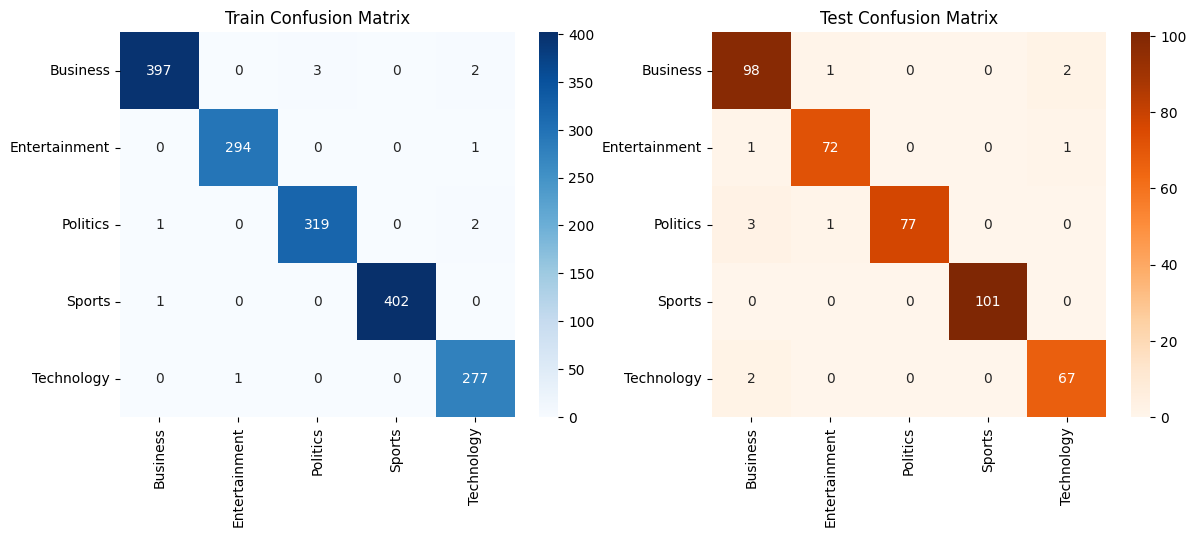


 Model & Results Logged in MLflow!


In [710]:
nb = MultinomialNB()
param_grid = {"alpha" : [0.1, 0.5, 1.0, 2.0]}
best_nb_tf_idf_bi_model = model_training_and_evaluation(nb, param_grid,X_train_tf_idf_bi, y_train_tf_idf_bi, X_test_tf_idf_bi, y_test_tf_idf_bi, category_labels,run_name = "MultinomialNB tf_idf_bi")

## DECISION TREE CLASSIFIER

Fitting 5 folds for each of 20 candidates, totalling 100 fits


2025/02/07 00:03:54 WARNING mlflow.utils.environment: Encountered an unexpected error while inferring pip requirements (model URI: C:\Users\saina\AppData\Local\Temp\tmpgmzqenoy\model\model.pkl, flavor: sklearn). Fall back to return ['scikit-learn==1.5.1', 'cloudpickle==3.1.1']. Set logging level to DEBUG to see the full traceback. 



 Best Hyperparameters: {'min_samples_split': 20, 'min_samples_leaf': 2, 'max_leaf_nodes': None, 'max_depth': 30, 'criterion': 'gini', 'class_weight': 'balanced'}

 Training Metrics:
   Accuracy  Precision    Recall  F1-score  ROC-AUC
0  0.954706   0.955135  0.954706  0.954798  0.99839

 Testing Metrics:
   Accuracy  Precision    Recall  F1-score   ROC-AUC
0  0.821596   0.821733  0.821596  0.821615  0.921615

 Training Classification Report:
               precision    recall  f1-score   support

     Business       0.95      0.95      0.95       402
Entertainment       0.95      0.95      0.95       295
     Politics       0.95      0.94      0.94       322
       Sports       0.99      0.97      0.98       403
   Technology       0.93      0.97      0.95       278

     accuracy                           0.95      1700
    macro avg       0.95      0.95      0.95      1700
 weighted avg       0.96      0.95      0.95      1700


 Testing Classification Report:
               precisio

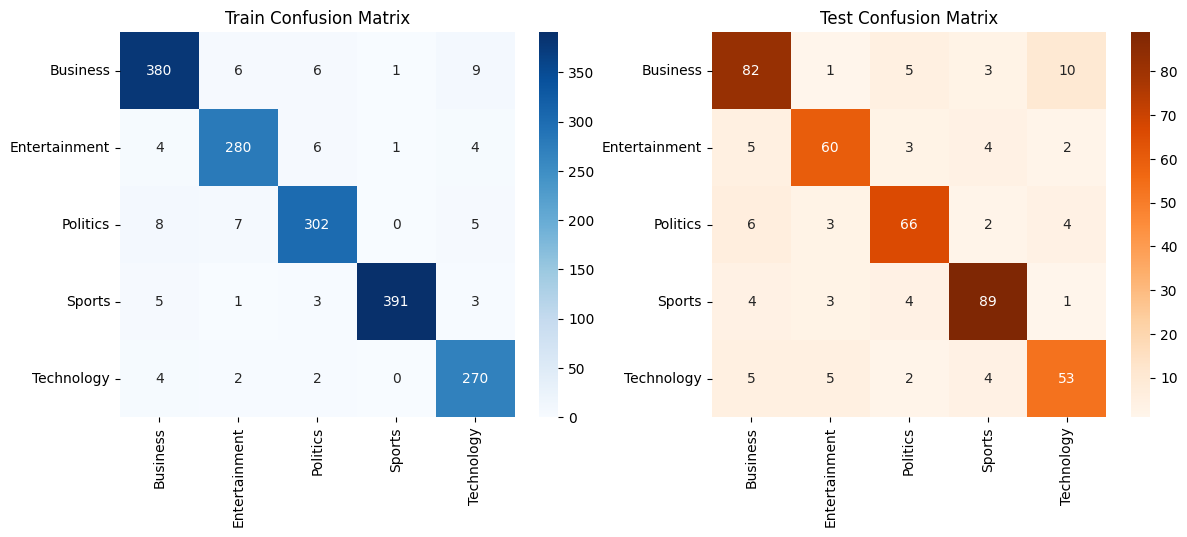


 Model & Results Logged in MLflow!


In [711]:
dt = DecisionTreeClassifier(random_state=42)
param_grid = {
    'criterion': ['gini', 'entropy'],  # Function to measure the quality of a split
    'max_depth': [None, 10, 20, 30, 40, 50],  # The maximum depth of the tree
    'min_samples_split': [2, 5, 10, 20],  # The minimum number of samples required to split an internal node
    'min_samples_leaf': [1, 2, 4, 10],   # The minimum number of samples required to be at a leaf node
    'max_leaf_nodes': [None, 10, 20, 30],  # Grow a tree with max_leaf_nodes in best-first fashion
    'class_weight': ['balanced'],  # Weights associated with classes
}
best_dt_tf_idf_bi_model = model_training_and_evaluation(dt,param_grid, X_train_tf_idf_bi, y_train_tf_idf_bi, X_test_tf_idf_bi, y_test_tf_idf_bi, category_labels,run_name="DecisionTree_tf_idf_bi")

## NEAREST NEIGHBORS CLASSIFIER

Fitting 5 folds for each of 20 candidates, totalling 100 fits


2025/02/07 00:04:25 WARNING mlflow.utils.environment: Encountered an unexpected error while inferring pip requirements (model URI: C:\Users\saina\AppData\Local\Temp\tmp3qw_3rr4\model\model.pkl, flavor: sklearn). Fall back to return ['scikit-learn==1.5.1', 'cloudpickle==3.1.1']. Set logging level to DEBUG to see the full traceback. 



 Best Hyperparameters: {'p': 2, 'n_neighbors': 20, 'n_jobs': -1, 'metric': 'minkowski'}

 Training Metrics:
   Accuracy  Precision    Recall  F1-score   ROC-AUC
0  0.955294   0.955582  0.955294  0.955198  0.997112

 Testing Metrics:
   Accuracy  Precision    Recall  F1-score   ROC-AUC
0  0.964789   0.965075  0.964789  0.964725  0.998474

 Training Classification Report:
               precision    recall  f1-score   support

     Business       0.97      0.92      0.95       402
Entertainment       0.96      0.96      0.96       295
     Politics       0.93      0.96      0.94       322
       Sports       0.97      0.99      0.98       403
   Technology       0.94      0.94      0.94       278

     accuracy                           0.96      1700
    macro avg       0.95      0.95      0.95      1700
 weighted avg       0.96      0.96      0.96      1700


 Testing Classification Report:
               precision    recall  f1-score   support

     Business       0.96      0.94     

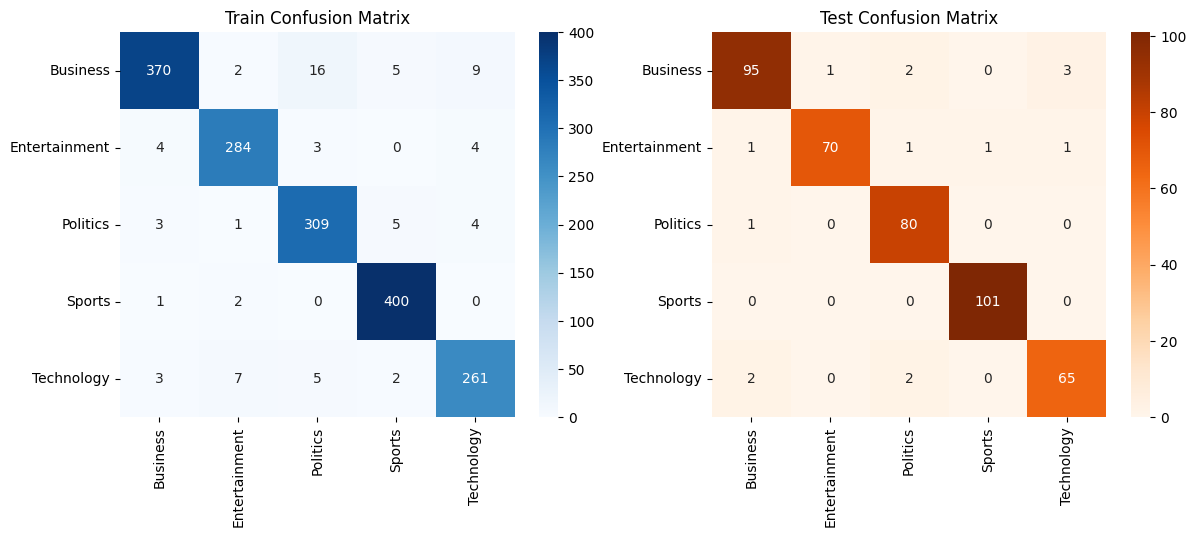


 Model & Results Logged in MLflow!


In [712]:
knn = KNeighborsClassifier()
param_grid = {
    'n_neighbors': [3, 5, 7, 9, 11, 15, 20],  # The number of neighbors to use for kneighbors queries
    'p': [1, 2],  # Power parameter for the Minkowski distance
    'metric': ['minkowski', 'euclidean', 'manhattan'],  # Distance metric to use
    'n_jobs': [-1]  # Number of jobs to run in parallel
}
best_knn_tf_idf_bi_model = model_training_and_evaluation(knn, param_grid,X_train_tf_idf_bi, y_train_tf_idf_bi, X_test_tf_idf_bi, y_test_tf_idf_bi, category_labels,run_name = "KNN_tf_idf_bi")

## RANDOM FOREST CLASSIFIER

Fitting 5 folds for each of 20 candidates, totalling 100 fits


2025/02/07 00:05:03 WARNING mlflow.utils.environment: Encountered an unexpected error while inferring pip requirements (model URI: C:\Users\saina\AppData\Local\Temp\tmprz_ybum4\model\model.pkl, flavor: sklearn). Fall back to return ['scikit-learn==1.5.1', 'cloudpickle==3.1.1']. Set logging level to DEBUG to see the full traceback. 



 Best Hyperparameters: {'n_estimators': 200, 'min_samples_split': 5, 'min_samples_leaf': 2, 'max_depth': None}

 Training Metrics:
   Accuracy  Precision  Recall  F1-score   ROC-AUC
0       1.0        1.0     1.0       1.0  0.999999

 Testing Metrics:
   Accuracy  Precision    Recall  F1-score   ROC-AUC
0  0.955399   0.957364  0.955399  0.955538  0.998604

 Training Classification Report:
               precision    recall  f1-score   support

     Business       1.00      1.00      1.00       402
Entertainment       1.00      1.00      1.00       295
     Politics       1.00      1.00      1.00       322
       Sports       1.00      1.00      1.00       403
   Technology       1.00      1.00      1.00       278

     accuracy                           1.00      1700
    macro avg       1.00      1.00      1.00      1700
 weighted avg       1.00      1.00      1.00      1700


 Testing Classification Report:
               precision    recall  f1-score   support

     Business       

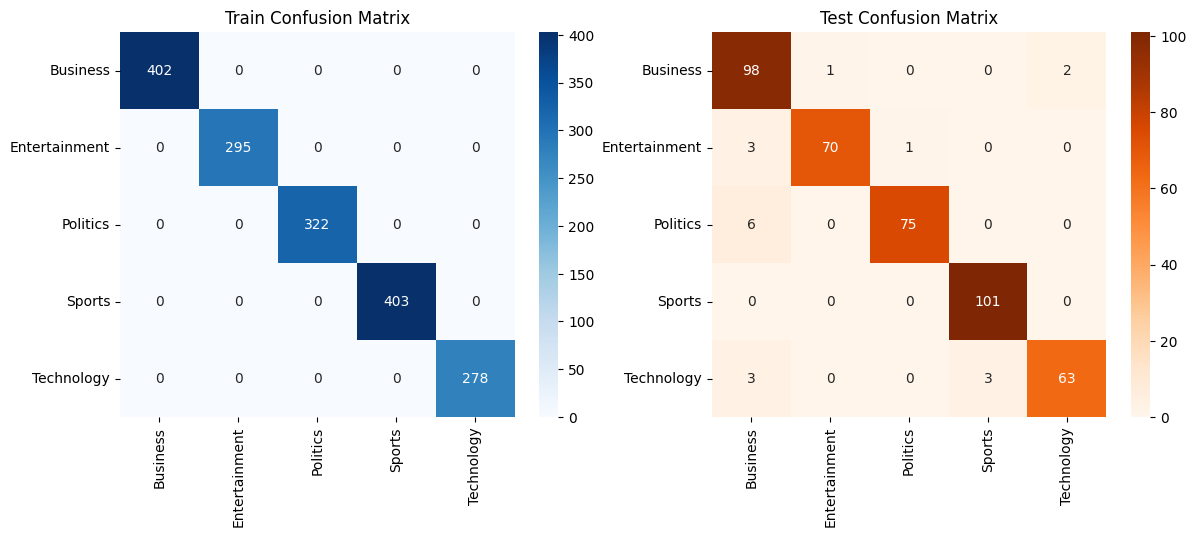


 Model & Results Logged in MLflow!


In [713]:
rf = RandomForestClassifier()
param_grid ={
    'n_estimators': [50, 100, 150, 200],  # Number of trees in the forest
    'max_depth': [None, 10, 20, 30],  # Maximum depth of the tree
    'min_samples_split': [2, 5, 10],  # Minimum number of samples required to split an internal node
    'min_samples_leaf': [1, 2, 4],  # Minimum number of samples required to be at a leaf node
}
best_rf_tf_idf_bi_model = model_training_and_evaluation(rf,param_grid, X_train_tf_idf_bi, y_train_tf_idf_bi, X_test_tf_idf_bi, y_test_tf_idf_bi, category_labels,cv = 5, n_iter = 20, run_name="RandomForest_tf_idf_bi")


## GRADIENT BOOSTING CLASSIFIER

Fitting 3 folds for each of 2 candidates, totalling 6 fits


2025/02/07 00:19:41 WARNING mlflow.utils.environment: Encountered an unexpected error while inferring pip requirements (model URI: C:\Users\saina\AppData\Local\Temp\tmp_as5dipu\model\model.pkl, flavor: sklearn). Fall back to return ['scikit-learn==1.5.1', 'cloudpickle==3.1.1']. Set logging level to DEBUG to see the full traceback. 



 Best Hyperparameters: {'n_estimators': 200, 'min_samples_split': 2, 'min_samples_leaf': 1, 'max_depth': 3, 'learning_rate': 0.2}

 Training Metrics:
   Accuracy  Precision  Recall  F1-score  ROC-AUC
0       1.0        1.0     1.0       1.0      1.0

 Testing Metrics:
   Accuracy  Precision    Recall  F1-score   ROC-AUC
0  0.962441   0.963359  0.962441  0.962452  0.998126

 Training Classification Report:
               precision    recall  f1-score   support

     Business       1.00      1.00      1.00       402
Entertainment       1.00      1.00      1.00       295
     Politics       1.00      1.00      1.00       322
       Sports       1.00      1.00      1.00       403
   Technology       1.00      1.00      1.00       278

     accuracy                           1.00      1700
    macro avg       1.00      1.00      1.00      1700
 weighted avg       1.00      1.00      1.00      1700


 Testing Classification Report:
               precision    recall  f1-score   support

   

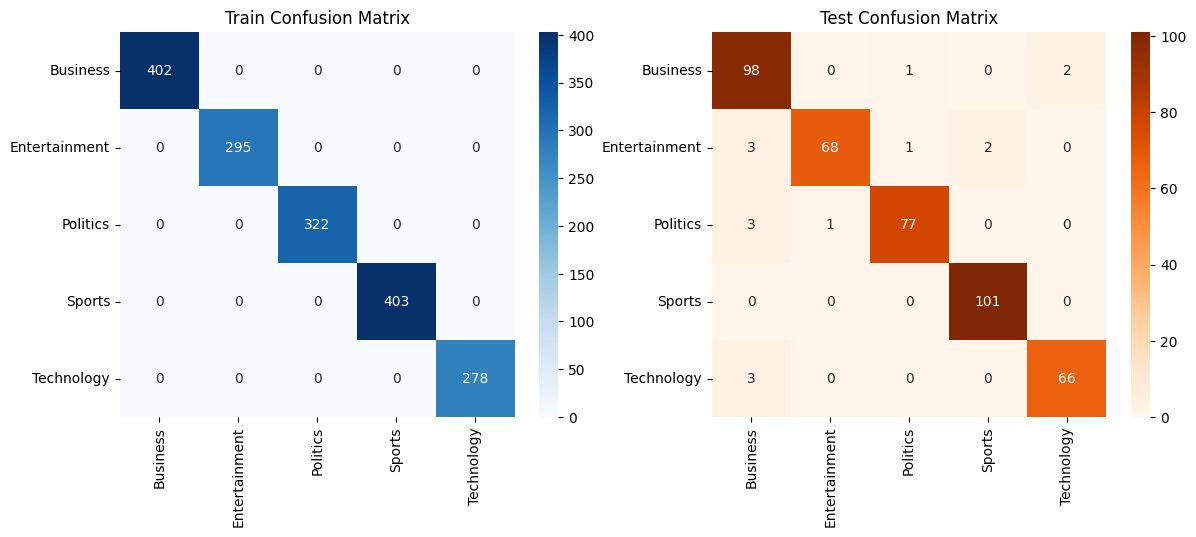


 Model & Results Logged in MLflow!


In [714]:
gbdt = GradientBoostingClassifier()
param_grid ={
    'n_estimators': [50, 100, 150, 200],  # Number of boosting stages to be run
    'learning_rate': [0.001, 0.01, 0.1, 0.2],  # Step size for each iteration, trade-off between model complexity and learning speed
    'max_depth': [3, 5, 7, 10],  # Maximum depth of individual trees
    'min_samples_split': [2, 5, 10],  # Minimum number of samples required to split an internal node
    'min_samples_leaf': [1, 2, 4],  # Minimum number of samples required at a leaf node
}
best_gbdt_tf_idf_bi_model = model_training_and_evaluation(gbdt,param_grid, X_train_tf_idf_bi, y_train_tf_idf_bi, X_test_tf_idf_bi, y_test_tf_idf_bi, category_labels,cv = 3, n_iter = 2, run_name="gbdt_tf_idf_bi")

# PLOTTING THE TEST METRICS FOR COMPARING ALL THE ML MODEL PERFORMANCE

Correct metrics found: ['metrics.test_Recall', 'metrics.test_Precision', 'metrics.test_F1-score', 'metrics.test_ROC-AUC', 'metrics.test_Accuracy']


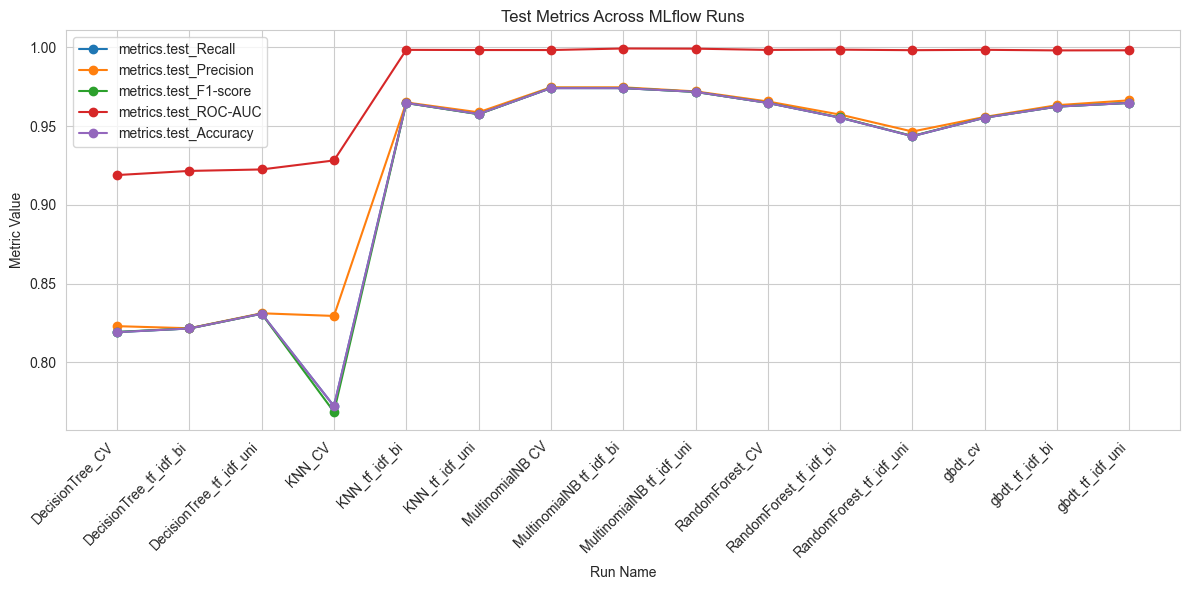

In [ ]:
experiment_name = "news_article_document_classification"  # Replace with your experiment name
experiment = mlflow.get_experiment_by_name(experiment_name)

if experiment is None:
    print(f"Experiment '{experiment_name}' not found.")
    exit()

# Get all runs
runs_df = mlflow.search_runs(experiment_ids=[experiment.experiment_id])

# Get run names separately (for older MLflow versions)
run_ids = runs_df['run_id'].tolist()
run_names = []
for run_id in run_ids:
    run = mlflow.get_run(run_id)
    run_name = run.info.run_name
    if run_name is None:
        run_name = f"Run ID: {run_id}"
        print(f"Warning: Run {run_id} has no name. Using default.")
    run_names.append(run_name)

runs_df['run_name'] = run_names

# Find correct metric names
correct_metrics = [col for col in runs_df.columns if "test" in col.lower()]
print("Correct metrics found:", correct_metrics)

test_metrics = runs_df[["run_name"] + correct_metrics]

# Convert to numeric, handling errors
for metric in correct_metrics:
    try:
        test_metrics[metric] = pd.to_numeric(test_metrics[metric], errors='coerce')
    except Exception as e:
        print(f"Error converting metric {metric}: {e}")
        # Handle the error, e.g., drop the column or fill with a value
        # test_metrics.drop(columns=[metric], inplace=True)  # Example: drop the column

# Handle NaN/inf values
test_metrics.replace([float('inf'), -float('inf')], pd.NA, inplace=True)
test_metrics.dropna(inplace=True)  # Or use fillna() if you prefer

# Order the runs by run_name alphabetically
test_metrics = test_metrics.sort_values(by="run_name")

# Plotting
sns.set_style("whitegrid")
plt.figure(figsize=(12, 6))

for metric in correct_metrics:
    plt.plot(test_metrics["run_name"], test_metrics[metric], marker='o', label=metric)

plt.xticks(rotation=45, ha="right")
plt.xlabel("Run Name")
plt.ylabel("Metric Value")
plt.title("Test Metrics Across MLflow Runs")
plt.legend()
plt.tight_layout()
plt.show()

# ACTIONABLE INSIGHTS, OBSERVATIONS AND RECOMMENDATIONS

### **Actionable Insights, Recommendations, and Observations**

#### **1. Model Performance Summary**
- **Top Performers**:  
  - **Random Forest** and **Gradient Boosting** consistently achieved the highest test accuracy (~0.96) and ROC-AUC (~0.998), indicating robust generalization.  
  - **Naive Bayes (MultinomialNB)** with TF-IDF also performed exceptionally well (test accuracy ~0.97), offering a simpler yet effective alternative.  
- **Underperformers**:  
  - **Decision Trees** and **KNN** struggled with overfitting (e.g., Decision Trees: train accuracy ~0.95 vs. test ~0.82).  
  - **Logistic Regression** showed moderate performance but was outperformed by ensemble methods.

#### **2. Key Observations**
- **TF-IDF Dominates**: Models using TF-IDF vectorization (e.g., Naive Bayes, Random Forest) outperformed Bag-of-Words (BoW), likely due to TF-IDF’s ability to weigh term importance across documents.  
- **Class Balance**: The dataset’s balanced distribution (e.g., Sports: 504, Technology: 347) minimized bias, but slight misclassifications (e.g., Politics vs. Business) suggest targeted improvements.  
- **Overfitting in Simpler Models**: Decision Trees and KNN showed significant performance gaps between training and testing, highlighting their unsuitability for this text classification task without regularization.  

#### **3. Recommendations**
- **Deploy Ensemble Models**:  
  - Prioritize **Random Forest** or **Gradient Boosting** for deployment due to their high accuracy and stability.  
  - Use **Naive Bayes** for scenarios requiring faster inference or lower computational cost.  
- **Address Overfitting**:  
  - For Decision Trees/KNN: Apply pruning, limit depth, or use ensemble variants (e.g., Bagging) to improve generalization.  
- **Optimize Text Representation**:  
  - Stick with **TF-IDF** for now, but experiment with advanced embeddings (e.g., BERT, Word2Vec) for potential gains.  
- **Monitor and Iterate**:  
  - Track model performance post-deployment for concept drift (e.g., evolving news topics).  
  - Retrain models periodically with updated data to maintain relevance.  

#### **4. Efficiency and Scalability**
- **Avoid Frequency Dictionaries**: The project noted inefficiencies with manual frequency dictionaries (high memory, poor scalability). TF-IDF or embeddings are better suited.  
- **Resource Allocation**: Ensure infrastructure can handle computational demands of ensemble models. Consider model compression (e.g., pruning, quantization) if needed.  

#### **5. Precision vs. Recall Trade-off**
- **Balanced Importance**: Both precision and recall are critical for this use case (as misclassifying news categories could mislead users). The high F1-scores (~0.95–0.97) across top models confirm this balance.  
- **Targeted Improvements**: Analyze confusion matrices (e.g., Politics vs. Business errors) to refine feature engineering or gather domain-specific keywords.  

#### **6. Future Directions**
- **Deep Learning**: Explore transformer-based models (e.g., BERT, RoBERTa) for potential accuracy boosts.  
- **Hyperparameter Tuning**: Use Bayesian Optimization instead of RandomizedSearchCV for faster convergence.  
- **Explainability**: For stakeholder trust, pair high-performing models (Random Forest) with SHAP/LIME interpretations.  

---

# QUESTIONAIRE

---

### Answers to Key Questions  

1. **How many news articles are present in the dataset that we have?**  
   - The dataset contains **2225** news articles. But 99 articles are duplicated. So effective number of articles are **2126**

2. **Most of the news articles are from _____ category.**  
   - Most of the news articles are from the **Sports** category.  

3. **Only ___ no. of articles belong to the ‘Technology’ category.**  
   - Only **347** articles belong to the ‘Technology’ category.  

4. **What are Stop Words and why should they be removed from the text data?**  
   - **Stop Words** are commonly occurring words such as "the", "is", and "and" that do not add significant meaning to a text. Removing stop words from text data helps reduce noise and enhances computational efficiency, making tasks like text classification and sentiment analysis more effective.  

5. **Explain the difference between Stemming and Lemmatization.**  
   - **Stemming** reduces words to their root by removing suffixes, often resulting in non-dictionary words (e.g., "running" → "run").  
   - **Lemmatization** converts words to their base or dictionary form (lemma), ensuring meaningful words as output (e.g., "running" → "run"). While lemmatization is more accurate, it is computationally more expensive than stemming.  

6. **Which of the techniques Bag of Words or TF-IDF is considered to be more efficient than the other?**  
   - **TF-IDF (Term Frequency-Inverse Document Frequency)** is generally more efficient than **Bag of Words (BoW)** because it accounts for word importance in relation to the entire corpus, reducing the influence of commonly occurring words while improving classification performance.  

7. **What’s the shape of train & test data sets after performing a 80:20 split.**  
   - In this analysis, an **80:20 split** was used, The resulting dataset sizes are:  
     - **Training dataset size**: 1700 articles  
     - **Testing dataset size**: 426 articles

8. **Which of the following is found to be the best-performing model?**  
   - The **Multinomial Naive Bayes** model was found to be the best-performing model. It is preferred due to its **low time complexity** and outstanding performance, achieving **99% accuracy on the training dataset** and **97% accuracy on the test dataset**.  

9. **According to this particular use case, both precision and recall are equally important. (T/F)**  
   - **True.** Since this use case involves classifying news articles into multiple categories, both precision (correct classification of relevant articles) and recall (ensuring no relevant article is missed) are equally important for balanced performance.

---